In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import spacy

In [ ]:
nlp=spacy.load('en_core_web_sm')
nlp=spacy.load("fr_core_news_sm")

In [4]:
import pandas as pd
df_profiles=pd.read_csv('resultats.csv', encoding ="utf8", sep=';')
df_profiles

,link,fullName,location,profile_title,connectionsCount,job_title,company_name,joining_date,exp_duree,college_name,...,degree_year,skills,endorsements,language,interests,certifications,Projects,Project numbers,Publications,Pub numbers
0,https://www.linkedin.com/in/mariem-moslah-5159...,Mariem Moslah,"Tunis, Tunisie",Data | Machine Learning | Big data | Python | R&D,461 relations,"['R&D Engineer', 'Data scientist/ Big data', '...","['mANTU\n Temps plein', 'LARODEC resear...","['nov. 2018 – avr. 2020', 'févr. 2017 – déc. 2...","['1 an 6 mois', '11 mois', '3 mois']","['Polytech Nantes', 'Institut supérieur de Ges...",...,"['2016 – 2017', '2015 – 2017', '2012 – 2015']","['Python', 'Data Engineering', 'Machine Learni...",NaN,"['Anglais', 'Arabe', 'Français']","['Amazon', 'Sintegra Consulting', 'Infor', 'Ca...","['Python Fundamentals Course', 'Data Analytics...",NaN,NaN,NaN,NaN
1,https://www.linkedin.com/in/zeineb-zribi?miniP...,zeineb zribi,"Tunis, Tunisie",Data Science Intern @ Orange,Plus de 500 relations,"['Data Science Intern', 'Data Science Intern',...","['Orange\n Stage', 'STB Bank الشركة الت...","['févr. 2021 – Aujourd’hui', 'juil. 2020 – aoû...","['4 mois', '2 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,['2016 – 2021'],"['Deep learning', 'NLP', 'Python', 'C#', 'UML'...","['Srinjoy Ganguly', 'Srinjoy Ganguly', 'Srinjo...",NaN,"['Oracle', 'Thales', 'Infor', 'Orange', 'Socié...",['Python for Data Science and AI'],NaN,NaN,NaN,NaN
2,https://www.linkedin.com/in/sofien-khanfir-736...,Sofien Khanfir,"Ariana Médina, Ariana, Tunisie",Data Science Consultant,Plus de 500 relations,"['Remote Intern', 'Remote Intern', 'Internship']","['Andex', 'Mitakus analytics', 'SIGMA Conseil']","['sept. 2019 – déc. 2019', 'janv. 2019 – mai 2...","['4 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,"['2015 – 2020', '2012 – 2015']","['R', 'Python', 'Apprentissage automatique', '...","['Boukercha Sarra', 'Boukercha Sarra, hautemen...","['Anglais', 'Arabe', 'Espagnol', 'Français']","['NetApp', 'Sopra Steria', 'LinkedIn', 'Artifi...",['Fundamentals of Deep Learning for Computer V...,NaN,NaN,NaN,NaN
3,https://www.linkedin.com/in/wathek-mezni-92694...,Wathek Mezni,"Tunis, Tunisie",Data Scientist at MENAPS,Plus de 500 relations,"['Data Scientist', 'Data Science Intern', 'Int...","['MENAPS\n Stage', 'WEVIOO', 'I-360 Tec...","['avr. 2021 – Aujourd’hui', 'janv. 2020 – mai ...","['2 mois', '5 mois', '4 mois']","['Le Mans Université', ""Ecole Supérieure Privé...",...,"['2019 – 2021', '2018 – 2021', '2016 – 2018']","['Python', 'Machine learning', 'Deep Learning'...","['Srinjoy Ganguly, hautement qualifié(e) dans ...",NaN,"['Simon Sinek', 'KDnuggets AI, Big Data, Data ...",['Neural Networks and Deep Learning'],NaN,NaN,NaN,NaN
4,https://www.linkedin.com/in/ons-aouina?miniPro...,Ons Aouina,"Ben Arous, Tunisie",IT Solutions Developer at Kalya | Data Scientist,Plus de 500 relations,"['IT Solutions Developer', 'Stage de fin d’étu...","['Kalya\n Temps plein', 'LIRMM\n ...","['nov. 2020 – Aujourd’hui', 'mars 2020 – août ...","['7 mois', '6 mois', '1 an 2 mois', '2 mois', ...","[""Institut supérieur d'informatique"", ""Institu...",...,"['2017 – 2020', '2014 – 2017', '2010 – 2014']","['Python', 'Machine Learning', 'Java', 'Busine...",['Gerahrd V. Edom - DataWithASoul et 7 relatio...,"['Anglais', 'Arabic', 'Francais', 'Italian']","['Unilever', 'Atos', 'Sramana Mitra', 'Daymond...",['Improving Deep Neural Networks: Hyperparamet...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,https://www.linkedin.com/in/mona-tayahi?miniPr...,Mouné Tayéhi,"Tunis, Tunisie",Software Engineer at Cognira,Plus de 500 relations,"['Software Engineer', 'stagiaire', 'Stagiaire']","['Cognira', 'Simple.Expert', 'Simple.Expert']","['sept. 2017 – Aujourd’hui', 'janv. 2017 – jui...","['4 ans', '6 mois', '2 mois']","[""ENSI - Ecole Nationale des Sciences de l'Inf...",...,

Exploration des données

In [5]:
#dimensions
df_profiles.shape

(300, 21)

In [6]:
#data type
df_profiles.dtypes

link                 object
fullName             object
location             object
profile_title        object
connectionsCount     object
job_title            object
company_name         object
joining_date         object
exp_duree            object
college_name         object
degree_name          object
degree_year          object
skills               object
endorsements         object
language             object
interests            object
certifications       object
Projects             object
Project numbers     float64
Publications         object
Pub numbers         float64
dtype: object

In [7]:
#déterminer les valeurs null pour chaque colonne
df_profiles.isnull().sum()

link                  0
fullName              0
location              0
profile_title         0
connectionsCount      6
job_title            38
company_name         38
joining_date         38
exp_duree            38
college_name         32
degree_name          46
degree_year          33
skills               44
endorsements         78
language            125
interests            55
certifications       86
Projects            264
Project numbers     265
Publications        292
Pub numbers         292
dtype: int64

Text(0.5, 1.0, 'Project Numbers')

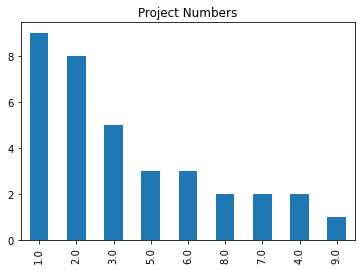

In [8]:
df_profiles['Project numbers'].value_counts().plot.bar()
plt.title('Project Numbers')

# Data Preparation

In [60]:
#traitements des valeurs manquantes
# fillna numeric variable with 0
for Columns in ['Project numbers','Pub numbers']:
    df_profiles[Columns] = df_profiles[Columns].fillna (0)
df_profiles[['Project numbers','Pub numbers']].head(10)

,Project numbers,Pub numbers
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,2.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [61]:
# fillna categorial variable with new categorie "Unknown"
for Columns in ['connectionsCount','job_title','company_name','joining_date','exp_duree', 'college_name', 'degree_name','degree_year','skills','endorsements','language','interests','certifications','Projects','Publications']:
    df_profiles[Columns] = np.where(df_profiles[Columns].isnull(),"Unknown",df_profiles[Columns])
#2. Display result
df_profiles.head(10)

,link,fullName,location,profile_title,connectionsCount,job_title,company_name,joining_date,exp_duree,college_name,...,degree_year,skills,endorsements,language,interests,certifications,Projects,Project numbers,Publications,Pub numbers
0,https://www.linkedin.com/in/mariem-moslah-5159...,Mariem Moslah,"Tunis, Tunisie",Data | Machine Learning | Big data | Python | R&D,461 relations,"['R&D Engineer', 'Data scientist/ Big data', '...","['mANTU\n Temps plein', 'LARODEC resear...","['nov. 2018 – avr. 2020', 'févr. 2017 – déc. 2...","['1 an 6 mois', '11 mois', '3 mois']","['Polytech Nantes', 'Institut supérieur de Ges...",...,"['2016 – 2017', '2015 – 2017', '2012 – 2015']","['Python', 'Data Engineering', 'Machine Learni...",Unknown,"['Anglais', 'Arabe', 'Français']","['Amazon', 'Sintegra Consulting', 'Infor', 'Ca...","['Python Fundamentals Course', 'Data Analytics...",Unknown,0.0,Unknown,0.0
1,https://www.linkedin.com/in/zeineb-zribi?miniP...,zeineb zribi,"Tunis, Tunisie",Data Science Intern @ Orange,Plus de 500 relations,"['Data Science Intern', 'Data Science Intern',...","['Orange\n Stage', 'STB Bank الشركة الت...","['févr. 2021 – Aujourd’hui', 'juil. 2020 – aoû...","['4 mois', '2 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,['2016 – 2021'],"['Deep learning', 'NLP', 'Python', 'C#', 'UML'...","['Srinjoy Ganguly', 'Srinjoy Ganguly', 'Srinjo...",Unknown,"['Oracle', 'Thales', 'Infor', 'Orange', 'Socié...",['Python for Data Science and AI'],Unknown,0.0,Unknown,0.0
2,https://www.linkedin.com/in/sofien-khanfir-736...,Sofien Khanfir,"Ariana Médina, Ariana, Tunisie",Data Science Consultant,Plus de 500 relations,"['Remote Intern', 'Remote Intern', 'Internship']","['Andex', 'Mitakus analytics', 'SIGMA Conseil']","['sept. 2019 – déc. 2019', 'janv. 2019 – mai 2...","['4 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,"['2015 – 2020', '2012 – 2015']","['R', 'Python', 'Apprentissage automatique', '...","['Boukercha Sarra', 'Boukercha Sarra, hautemen...","['Anglais', 'Arabe', 'Espagnol', 'Français']","['NetApp', 'Sopra Steria', 'LinkedIn', 'Artifi...",['Fundamentals of Deep Learning for Computer V...,Unknown,0.0,Unknown,0.0
3,https://www.linkedin.com/in/wathek-mezni-92694...,Wathek Mezni,"Tunis, Tunisie",Data Scientist at MENAPS,Plus de 500 relations,"['Data Scientist', 'Data Science Intern', 'Int...","['MENAPS\n Stage', 'WEVIOO', 'I-360 Tec...","['avr. 2021 – Aujourd’hui', 'janv. 2020 – mai ...","['2 mois', '5 mois', '4 mois']","['Le Mans Université', ""Ecole Supérieure Privé...",...,"['2019 – 2021', '2018 – 2021', '2016 – 2018']","['Python', 'Machine learning', 'Deep Learning'...","['Srinjoy Ganguly, hautement qualifié(e) dans ...",Unknown,"['Simon Sinek', 'KDnuggets AI, Big Data, Data ...",['Neural Networks and Deep Learning'],Unknown,0.0,Unknown,0.0
4,https://www.linkedin.com/in/ons-aouina?miniPro...,Ons Aouina,"Ben Arous, Tunisie",IT Solutions Developer at Kalya | Data Scientist,Plus de 500 relations,"['IT Solutions Developer', 'Stage de fin d’étu...","['Kalya\n Temps plein', 'LIRMM\n ...","['nov. 2020 – Aujourd’hui', 'mars 2020 – août ...","['7 mois', '6 mois', '1 an 2 mois', '2 mois', ...","[""Institut supérieur d'informatique"", ""Institu...",...,"['2017 – 2020', '2014 – 2017', '2010 – 2014']","['Python', 'Machine Learning', 'Java', 'Busine...",['Gerahrd V. Edom - DataWithASoul et 7 relatio...,"['Anglais', 'Arabic', 'Francais', 'Italian']","['Unilever', 'Atos', 'Sramana Mitra', 'Daymond...",['Improving Deep Neural Networks: Hyperparamet...,Unknown,0.0,Unknown,0.0
5,https://www.linkedin.com/in/benmhannakoussay?m...,Koussay Ben Mhanna,"Menzah, Tunis, Tunisie",Data Science Intern chez Orange Tunisie,Plus de 500 relations,"['Data Science Intern', 'AI instructor', 'Busi...","['Orange Tunisie\n Stage', 'Go My Code\...","['févr. 2021 – Aujourd’hui', 'juil. 2020 – jan...","['4 mois', '7 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,"['

NLP

In [7]:
import nltk
import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
import time

Traitement des compétences

In [62]:
#Translate to english
from google_trans_new import google_translator
translator = google_translator()
df_profiles['skills']=df_profiles['skills'].apply(lambda x: translator.translate(x,lang_src='fr',lang_tgt ='en'))
df_profiles['skills']

0      ['Python', 'Data Engineering', 'Machine Learni...
1      ['Deep Learning', 'NLP', 'Python', 'C #', 'Uml...
2      ['R', 'Python', 'Automatic Learning', 'C ++', ...
3      ['Python', 'Machine Learning', 'Deep Learning'...
4      ['Python', 'Machine Learning', 'Java', 'Busine...
                             ...                        
295    ['Python', 'Apache Spark', 'Devops', 'Machine ...
296    ['Big Data', 'Big Data', 'Business Intelligenc...
297    ['Python', 'C #', 'Deep Learning', 'Telecommun...
298    ['Python', 'Apache Spark', 'Devops', 'Machine ...
299    ['Artificial Intelligence', 'Machine Learning'...
Name: skills, Length: 300, dtype: object

In [63]:
#lowercase 
df_profiles['skills'] = df_profiles['skills'].apply(lambda x : x.lower())
df_profiles['skills']

0      ['python', 'data engineering', 'machine learni...
1      ['deep learning', 'nlp', 'python', 'c #', 'uml...
2      ['r', 'python', 'automatic learning', 'c ++', ...
3      ['python', 'machine learning', 'deep learning'...
4      ['python', 'machine learning', 'java', 'busine...
                             ...                        
295    ['python', 'apache spark', 'devops', 'machine ...
296    ['big data', 'big data', 'business intelligenc...
297    ['python', 'c #', 'deep learning', 'telecommun...
298    ['python', 'apache spark', 'devops', 'machine ...
299    ['artificial intelligence', 'machine learning'...
Name: skills, Length: 300, dtype: object

In [64]:
#Tokenization
from nltk import word_tokenize

def tokenization(text):
    text=nltk.word_tokenize(text)
    return text

df_profiles['skills'] = df_profiles['skills'].apply(lambda x : tokenization(x))
df_profiles['skills']

0      [[, 'python, ', ,, 'data, engineering, ', ,, '...
1      [[, 'deep, learning, ', ,, 'nlp, ', ,, 'python...
2      [[, ', r, ', ,, 'python, ', ,, 'automatic, lea...
3      [[, 'python, ', ,, 'machine, learning, ', ,, '...
4      [[, 'python, ', ,, 'machine, learning, ', ,, '...
                             ...                        
295    [[, 'python, ', ,, 'apache, spark, ', ,, 'devo...
296    [[, 'big, data, ', ,, 'big, data, ', ,, 'busin...
297    [[, 'python, ', ,, ', c, #, ', ,, 'deep, learn...
298    [[, 'python, ', ,, 'apache, spark, ', ,, 'devo...
299    [[, 'artificial, intelligence, ', ,, 'machine,...
Name: skills, Length: 300, dtype: object

In [65]:
#Remove punctuation
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w.,#++/()\s]','', word)
        new_words.append(new_word)
    return new_words

df_profiles['skills'] = df_profiles['skills'].apply(lambda x : remove_punctuation(x))
df_profiles['skills'] = df_profiles['skills'].apply(lambda x : ' '.join(x))
df_profiles['skills']

0       python  , data engineering  , machine learnin...
1       deep learning  , nlp  , python  ,  c #  , uml...
2        r  , python  , automatic learning  ,  c ++  ...
3       python  , machine learning  , deep learning  ...
4       python  , machine learning  , java  , busines...
                             ...                        
295     python  , apache spark  , devops  , machine l...
296     big data  , big data  , business intelligence...
297     python  ,  c #  , deep learning  , telecommun...
298     python  , apache spark  , devops  , machine l...
299     artificial intelligence  , machine learning  ...
Name: skills, Length: 300, dtype: object

In [66]:
# remove ()
df_profiles['skills'] = df_profiles['skills'].str.replace(r"\s\([^()]*\)","")
df_profiles['skills']

<ipython-input-66-e95d19eaa9d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_profiles['skills'] = df_profiles['skills'].str.replace(r"\s\([^()]*\)","")


0       python  , data engineering  , machine learnin...
1       deep learning  , nlp  , python  ,  c #  , uml...
2        r  , python  , automatic learning  ,  c ++  ...
3       python  , machine learning  , deep learning  ...
4       python  , machine learning  , java  , busines...
                             ...                        
295     python  , apache spark  , devops  , machine l...
296     big data  , big data  , business intelligence...
297     python  ,  c #  , deep learning  , telecommun...
298     python  , apache spark  , devops  , machine l...
299     artificial intelligence  , machine learning  ...
Name: skills, Length: 300, dtype: object

In [67]:
to_replace=['machine learning|machine learning algorithms','deep learning','artificial intelligence|ia|ai', 'intelligent networks|neural network', 'hadoop', 'natural language processing', 'etl|etl tools', 'talend|talend open studio', 'unified modeling language','android|android development']
replace_with=['ml','dl','ai','nn', 'big data', 'nlp', 'etl', 'talend', 'uml','andoid']

df_profiles['skills']= df_profiles.skills.replace(to_replace, replace_with, regex=True)
df_profiles['skills']

0       python  , data engineering  , ml  , knowledge...
1       dl  , nlp  , python  ,  c #  , uml  , pl / sq...
2        r  , python  , automatic learning  ,  c ++  ...
3       python  , ml  , dl  , mathematics  ,  data wa...
4       python  , ml  , java  , business intelligence...
                             ...                        
295     python  , apache spark  , devops  , ml  , com...
296     big data  , big data  , business intelligence...
297     python  ,  c #  , dl  , telecommunications  ,...
298     python  , apache spark  , devops  , ml  , com...
299     ai  , ml  , data science  , supply chain opti...
Name: skills, Length: 300, dtype: object

In [68]:
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('big.*\s,','big data ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('business.*\s,','business intelligence ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('computer.*\s,','computer science ,',x)) 
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('data war.*\s,','data warehouse ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('sql server.*\s,','sql server ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('statisti.*\s,','statistic ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('spring.*\s,','spring ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('java.*\s,','java ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('decision.*\s,','decision ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('web.*\s,','web ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('oracle.*\s,','oracle ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('database.*\s,','database ,',x))
df_profiles['skills']= df_profiles['skills'].apply(lambda x : re.sub('agile.*\s,','agile ,',x))
df_profiles['skills']

0       python  , data engineering  , ml  , knowledge...
1       dl  , nlp  , python  ,  c #  , uml  , pl / sq...
2        r  , python  , automatic learning  ,  c ++  ...
3       python  , ml  , dl  , mathematics  ,  data wa...
4                python  , ml  , java ,  ml algorithms  
                             ...                        
295     python  , apache spark  , devops  , ml  , com...
296                             big data ,  rapidminer  
297     python  ,  c #  , dl  , telecommunications  ,...
298     python  , apache spark  , devops  , ml  , com...
299     ai  , ml  , data science  , supply chain opti...
Name: skills, Length: 300, dtype: object

In [69]:
def normalize(sentence):
    token_words=word_tokenize(sentence)
    token_words
    normalize_sentence=[]
    for word in token_words:
        normalize_sentence.append(word)
        normalize_sentence.append(" ")
    return "".join(normalize_sentence)

df_profiles['skills']= df_profiles['skills'].apply(lambda x : normalize(x))
df_profiles['skills']

0      python , data engineering , ml , knowledge of ...
1      dl , nlp , python , c # , uml , pl / sql , jav...
2      r , python , automatic learning , c ++ , php ,...
3      python , ml , dl , mathematics , data warehous...
4                    python , ml , java , ml algorithms 
                             ...                        
295    python , apache spark , devops , ml , computer...
296                               big data , rapidminer 
297    python , c # , dl , telecommunications , proje...
298    python , apache spark , devops , ml , computer...
299    ai , ml , data science , supply chain optimiza...
Name: skills, Length: 300, dtype: object

In [70]:
python_skills =["python ","tkinter ","cherrypy ","django ","flask ","pylons ","pyramid ","pylons ","web2py ","beautifulsoup ","sklearn ","sikitlearn ","selenium webdriver ","selenium ","seaborn ","scikitlearn "]
dl_skills = ["dl ","tensorflow ","recurrent neural ","rnn ","keras ", "pytorsh ","caffe ", "convolution neural network ", "cnn ","automatic speech recognition ","deep nns ","image treatment ","speech recognition ","sentimental analysis ","sentiment analysis ","pytorch "]
ml_skills = ["ml ", "data engineering ","machine learning ","classification ","regression ","clustering ","computer vision ","srilm ","theano ","lasagne ","scikit ","anaconda ","scrap ","text mining ","adas ","automatic learning ","text nlp ","texttospeech ","crisp ","crispdm ","nlp "]
big_data_skills = ["business analytic ","data mining ","data warehouse ","splunk ","scala ","julia ",
"fluentd ","grafana ","memcached ","knime ","statistica ","excel ",
"dashboarding ","big data ","hadoop ","spark ","storm ","rapidminer ","samoa ","hpcc ","quoble ","hive ","cloudera ","openrefine ","teradata ","kafka ","dashboard performance "]
bi_skills = ["bi ","business intelligence ","sap ","sisense ","bods ","talend ", "warehouse ","qliksense ","power bi ","looker ","tableau ","zoho ","ssis ","ssas ","ssrs ","data warehouse ","decision ","etl ","google analytics "]
web_scraping_skills= ["web scraping ","scrapy ","beautifulsup ","scrap ","web scrapping ", "data scraping ","scrapping web "]
data_skills= ["data engineering ", "data exploration ","data management ","data modeling ","data preparation ","data processing ","data visualization ","data cleaning / data transformation ","exploration of data ","data analysis ","data analytics "]
networking_skills = ["cisco ","pfsense ","san ", "sdns ","dhcp ","nat ","huawei ","troubleshooting ","ccna ","socket ","ip ","tcp ","tcp / ip ","udp ","ssh ","telnet ","lan ","vpn ","packet tracer ","wireshark "]
sql_skills = ["sql ","pl sql ","mysql ","ms sql ","sql server ","sqlite ","postgresql ","rubinius ","transactsql  ","mariadb ","vsql "]
nosql_skills=["couchdb ","cassandra ","mongo ","hbase ","redis ","scylla ","neo4j ","dynamodb ","memcached ","bigtable ","hypertable ","oracle ","nosql ","firebase ","mongodb "]
back_skills=["javascript ","backbone ","express.js ","kraken.js ","hapi.js ","koa.js ","totaljs ","nest.js ","sails.js ","meteor.js ","loopback ","derby.js ","adonis.js ","mojito ","keystone.js ","feathers.js ","restify.js ","actionHero.js ","sequelize ","moleculer ","backend web development ","turbo pascal ","kotlin ","node.js ","javascript ","babel ","npm ","eslint ","typescript "]
front_skills=["javascript ","angular ","vue.js ","react ","ember ","jquery ","prototype ","ext.js ","angularjs ","bootstrap ","frontend development ","webpack ","web ","redux.js ","react.js ","xml ","html ","html5 "]
sys_skills=["linux ","unix ","ubuntu ","redhat ","suse ","debian ","fedora ","bash ","nginx ","apache ","systemctl ","bash ","shell ","systemd ","ssh ","network ","linux system administration ","oracle ","database "]
c_skills=["c ","c ++ ","c # ","wxWidgets ","juce ","cegui ","cef ","gtk ","qt "]
css_skills=["css ","css3 ""bootstrap ","sass ","postcss "]
rest_skills=["soa ","soap ","rest ","http ","ajax ","rest apis "]
mobile_skills= ["ios development ","andoid ","flutter"]
git_skills=["git ","svn "]
java_skills=["java ","jee ","spring ","j2e ","struts ","hibernate ","wicket ","jsf ","dropwizard ","grails ","atg ","maven ","spring boot ","spring security ","framework spring "]
continus_build_skills=["buddy ","git ","github ","jenkins ","teamcity ","gocd ","bamboo ","circleci ","codeship ","buildbot ","nevercode ","integrity ","strider ","autorabit ","buildkite ","semaphore ","cruisecontrol ","urbancode "]
virt_skills=["docker ","vagrant ","wox ","rancher ","kubernetes ","mesos ","lxc ","openvz ", "kvm ","devops "]
cloud_skills= ["cloud computing ","aws ","google cloud ","bluemix ","ovh ","joyent ","microsoft Azure ","cloudwatt ","ikoula ","rackspace ","nimbus ","niftyname ","openstack ","opennebula ","eucalyptus ","vultr ","digitalocean "]
php_skills=["php ","symfony ","codeigniter ","agavi ","cakephp ","dframe ","flight ","fuelphp ","hoa ","horde ","jelix ","kumbiaphp ","laravel ","laminas ","mkframework ","modx ","pear ","website php ","zend ","yaf ","symfony 3"]
scrum_skills= ["zimbra ","confluence ","slack","scrum ","wrike ","agile ","trello ","jira ","assembla ","ntask ","targetprocess ","asana ","clarizen ","quickscrum ","scrumdo ","vivifyscrum ","scrumban ","kanban ","waterfall ","gitscrum "]
testing_skills = ["testrail ","zephyr ","jmeter ","testlink ","selenium ","qtp ","soapui ","tricentis tosca ","telerik ","katalon studio ","uft ","IBM RFT ","ranorex ","postman "]
teck_skills=["microservices "]
po_skills=["team building ","teamwork ","team spirit ","team management ","project management "]
embarque_skills = ["raspberry ","stm","assembleur ","arduino ","arduino uno ","assembly ","x86 assembly ","electronic ","embedded systems ","embedded systics "]
matlab_skills =["matlab "]
security_skills = ["ips ","audit ","symantec ","metasploit ","hacking ","vulnera ","phishing ","malware "]
telecom_skills = ["voip ","gsm "]
robo_skills =["kuka ","linx ","winautomation ","automai ","robotics ","rasa platform ","chatbot "] 
elastic_search_skills = ["elasticsearch ","logstash ","kibana "]
r_skills = ["r ","rstudio "]
math_skills=["applied mathematics ","stochastic calculation ","statistics ","statistic ","mathematics "]
multi_skills=["game theory ","unity3d ","virtual reality ","video mount ","3d studio max ","3d printing ","photoshop ","adobe photoshop ","adobe illustrator "]


def replace_skills(words):
    words = words.split(", ")
    new_words= []
    for word in words:
        if word in python_skills:
            word= "python"
        elif word in dl_skills:
            word = "deep_learning"
        elif word in ml_skills:
            word = "machine_learning"
        elif word in big_data_skills:
            word = "big_data"
        elif word in bi_skills:
            word = "bi"
        elif word in web_scraping_skills:
            word=  "web_scraping"
        elif word in data_skills:
            word = "data_skills"
        elif word in networking_skills:
            word = "networking"
        elif word in sql_skills:
            word = "sql_skills"
        elif word in nosql_skills:
            word = "nosql_skills"
        elif word in back_skills:
            word = "backend"
        elif word in front_skills:
            word = "frontend"
        elif word in sys_skills:
            word = "sys_skills"
        elif word in c_skills:
            word = "c_skills"
        elif word in css_skills:
            word = "css_skills"
        elif word in rest_skills:
            word = "rest_skills"
        elif word in mobile_skills:
            word = "mobile_skills"
        elif word in git_skills:
            word = "git_skills"
        elif word in java_skills:
            word = "java_skills"
        elif word in continus_build_skills:
            word = "continus_build_skills"
        elif word in virt_skills:
            word = "virtualisation"
        elif word in cloud_skills:
            word = "cloud_skills"
        elif word in php_skills:
            word = "php_skills"
        elif word in scrum_skills:
            word = "scrum_skills"
        elif word in testing_skills:
            word = "testing_skills"
        elif word in teck_skills:
            word = "teck_skills"
        elif word in po_skills:
            word = "po_skills"
        elif word in embarque_skills:
            word = "embarque_skills"
        elif word in matlab_skills:
            word = "matlab_skills"
        elif word in security_skills:
            word = "security_skills"
        elif word in telecom_skills:
            word = "telecom_skills"
        elif word in robo_skills:
            word = "robo_skills"
        elif word in elastic_search_skills:
            word = "elastic_search_skills"
        elif word in r_skills:
            word = "r_skills"
        elif word in math_skills:
            word = "math_skills"
        elif word in multi_skills:
            word = "multimedia_skills"
        else:
            word="other_skills"
        new_words.append(word)
    new_text= " , ".join(new_words)
    return new_text
    
    
df_profiles['skills']= df_profiles['skills'].apply(lambda x : replace_skills(x))
df_profiles['skills']

0      python , machine_learning , machine_learning ,...
1      deep_learning , machine_learning , python , c_...
2      r_skills , python , machine_learning , c_skill...
3      python , machine_learning , deep_learning , ma...
4      python , machine_learning , java_skills , othe...
                             ...                        
295    python , other_skills , virtualisation , machi...
296                                  big_data , big_data
297    python , c_skills , deep_learning , other_skil...
298    python , other_skills , virtualisation , machi...
299    other_skills , machine_learning , other_skills...
Name: skills, Length: 300, dtype: object

In [21]:
#CountVectorizer
import re
re_exp = r" , "
vectorizer_skills = CountVectorizer(tokenizer=lambda text: re.split(re_exp,text))
skills_f = vectorizer_skills.fit_transform(df_profiles.skills)
count_tokens_skills = vectorizer_skills.get_feature_names()
df_countvect_skills = pd.DataFrame(data = skills_f.toarray(),columns = count_tokens_skills)
print("Count Vectorizer\n")
print(df_countvect_skills)


Count Vectorizer

     backend  bi  big_data  c_skills  cloud_skills  css_skills  data_skills  \
0          0   0         1         0             0           0            1   
1          0   0         0         1             0           0            0   
2          0   0         0         2             0           0            0   
3          0   0         1         0             0           0            0   
4          0   0         0         0             0           0            0   
..       ...  ..       ...       ...           ...         ...          ...   
295        0   0         0         0             0           0            0   
296        0   0         2         0             0           0            0   
297        0   0         0         1             0           0            0   
298        0   0         0         0             0           0            0   
299        0   1         0         0             0           0            0   

     deep_learning  embarque_skil

In [72]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
re_exp = r" , "
vectorizer = TfidfVectorizer(tokenizer=lambda text: re.split(re_exp,text))
vz = vectorizer.fit_transform(df_profiles['skills'])
print(vz.shape)
tf_idf_dataframe=pd.DataFrame(vz.toarray(),columns=vectorizer.get_feature_names())
print(tf_idf_dataframe)

(300, 31)
     backend        bi  big_data  c_skills  cloud_skills  css_skills  \
0        0.0  0.000000  0.320429  0.000000           0.0         0.0   
1        0.0  0.000000  0.000000  0.416846           0.0         0.0   
2        0.0  0.000000  0.000000  0.488908           0.0         0.0   
3        0.0  0.000000  0.347542  0.000000           0.0         0.0   
4        0.0  0.000000  0.000000  0.000000           0.0         0.0   
..       ...       ...       ...       ...           ...         ...   
295      0.0  0.000000  0.000000  0.000000           0.0         0.0   
296      0.0  0.000000  1.000000  0.000000           0.0         0.0   
297      0.0  0.000000  0.000000  0.397126           0.0         0.0   
298      0.0  0.000000  0.000000  0.000000           0.0         0.0   
299      0.0  0.595471  0.000000  0.000000           0.0         0.0   

     data_skills  deep_learning  embarque_skills  frontend  ...  po_skills  \
0       0.330872       0.000000              0.

In [73]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']
tfidf

,tfidf
backend,4.761200
bi,3.711378
big_data,2.579976
c_skills,3.123591
cloud_skills,4.627669
css_skills,5.608498
data_skills,2.664059
deep_learning,2.612766
embarque_skills,4.915351
frontend,3.241374


Text(0, 0.5, 'Count')

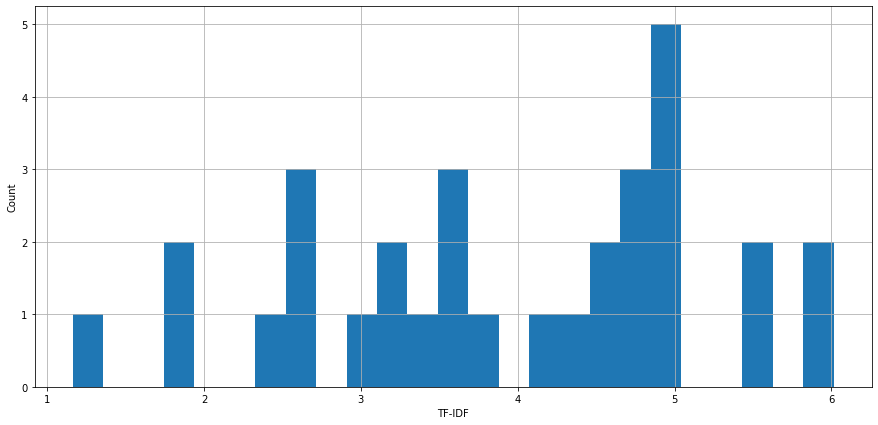

In [74]:
tfidf.tfidf.hist(bins=25, figsize=(15,7))
plt.xlabel("TF-IDF")
plt.ylabel("Count")

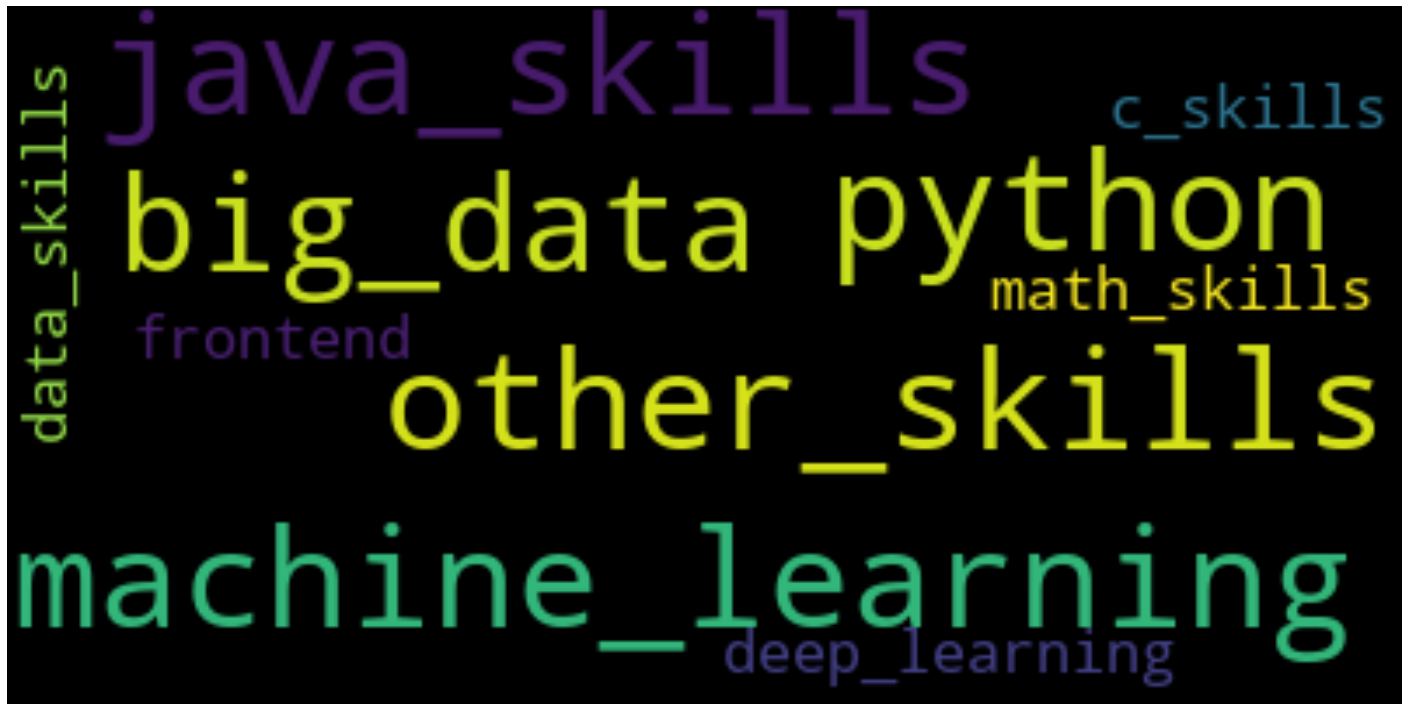

In [75]:
#top 10 skills
from wordcloud import WordCloud

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(10))

In [76]:
df_res = pd.concat([df_profiles, df_countvect_skills], axis=1)
#df_result.to_csv('data_cleaning_final.csv', index = False, header=True, encoding='utf-8', sep=';')

Traitement des diplomes (Degree)

In [77]:
df_profiles['degree_name'] = df_profiles['degree_name'].apply(lambda x : tokenization(x.lower()))
df_profiles['degree_name']

0      [[, ``, research, master, 's, degree, '', ,, `...
1                   [[, ``, diplôme, d'ingénieur, '', ]]
2      [[, ``, engineer, 's, degree, '', ,, 'baccalau...
3      [[, 'master, 2, (, m2, ), ', ,, ``, diplôme, d...
4      [[, ``, diplôme, d'ingénieur, '', ,, 'licence,...
                             ...                        
295    [[, ``, diplôme, d'ingénieur, '', ,, ``, conco...
296    [[, 'diplôme, telecom, bretagne, ', ,, ``, dip...
297    [[, ``, master, 's, degree, '', ,, ``, enginee...
298    [[, ``, diplôme, d'ingénieur, '', ,, ``, conco...
299    [[, ``, master, 's, degree, '', ,, 'bs, ', ,, ...
Name: degree_name, Length: 300, dtype: object

In [78]:
def remove_punctuation_degree(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w.,()/\s]','', word)
        new_words.append(new_word)
        
    return new_words
df_profiles['degree_name'] = df_profiles['degree_name'].apply(lambda x : remove_punctuation_degree(x))
df_profiles['degree_name'] = df_profiles['degree_name'].apply(lambda x : ' '.join(x))
df_profiles['degree_name']

0        research master s degree  ,  bachelor s degr...
1                                   diplôme dingénieur  
2                    engineer s degree  , baccalauréat  
3       master 2 ( m2 )  ,  diplôme dingénieur  , adm...
4        diplôme dingénieur  , licence fondamentale e...
                             ...                        
295      diplôme dingénieur  ,  concours national den...
296     diplôme telecom bretagne  ,  diplôme dingénie...
297      master s degree  ,  engineer s degree  , nat...
298      diplôme dingénieur  ,  concours national den...
299      master s degree  , bs  , doctor of philosoph...
Name: degree_name, Length: 300, dtype: object

In [80]:
df_profiles['degree_name'] = df_profiles['degree_name'].apply(lambda x : normalize(x))
df_profiles['degree_name']

0          research master s degree , bachelor s degree 
1                                    diplôme dingénieur 
2                      engineer s degree , baccalauréat 
3      master 2 ( m2 ) , diplôme dingénieur , admis a...
4      diplôme dingénieur , licence fondamentale en s...
                             ...                        
295    diplôme dingénieur , concours national dentrée...
296    diplôme telecom bretagne , diplôme dingénieur ...
297    master s degree , engineer s degree , national...
298    diplôme dingénieur , concours national dentrée...
299    master s degree , bs , doctor of philosophy ( ...
Name: degree_name, Length: 300, dtype: object

In [82]:
def stand_degree (text):
    text= text.split(" , ")
    new_words= []
    for word in text:
        if word is not None:
            if re.search("(bacc\w+|bach\w+|High school \w+)" ,word.lower()) is not None:
                word= "bac"
            elif re.search("(pre\w+|cycle p\w+|concours \w+|prép)" ,word.lower()) is not None:
                word= "prep"
            elif re.search("licen\w+" ,word.lower()) is not None:
                word= "licence"
            elif re.search("(mait\w+|mâit\w+|mast\w+|maît\w+|mâît\w+|m2 \w+)" ,word.lower()) is not None:
                word= "master"
            elif re.search("(ing\w+|engi\w+|génie \w+)" ,word.lower()) is not None:
                word= "eng"
            elif re.search("(doct\w+|phd\w*)" ,word.lower()) is not None:
                word= "phd"
            else:
                word= "other"
            new_words.append(word)
    return new_words

df_profiles['degree_name']= df_profiles['degree_name'].apply(lambda x : stand_degree(x))
df_profiles['degree_name'] = df_profiles['degree_name'].apply(lambda x : ', '.join(x))
df_profiles['degree_name']

0             master, bac
1                     eng
2                eng, bac
3       master, eng, prep
4       eng, licence, bac
              ...        
295             eng, prep
296       other, eng, eng
297      master, eng, eng
298             eng, prep
299    master, other, phd
Name: degree_name, Length: 300, dtype: object

In [83]:
import re
re_exp = r", "
vectorizer = CountVectorizer(tokenizer=lambda text: re.split(re_exp,text))
degree_f = vectorizer.fit_transform(df_profiles.degree_name)
count_tokens_degree = vectorizer.get_feature_names()
df_countvect_degree = pd.DataFrame(data = degree_f.toarray(),columns = count_tokens_degree)
print("Count Vectorizer\n")
print(df_countvect_degree)

Count Vectorizer

     bac  eng  licence  master  other  phd  prep
0      1    0        0       1      0    0     0
1      0    1        0       0      0    0     0
2      1    1        0       0      0    0     0
3      0    1        0       1      0    0     1
4      1    1        1       0      0    0     0
..   ...  ...      ...     ...    ...  ...   ...
295    0    1        0       0      0    0     1
296    0    2        0       0      1    0     0
297    0    2        0       1      0    0     0
298    0    1        0       0      0    0     1
299    0    0        0       1      1    1     0

[300 rows x 7 columns]


In [84]:
df_res = pd.concat([df_res, df_countvect_degree], axis=1)
#df_res.to_csv('data_cleaning_final.csv', index = False, header=True, encoding='utf-8', sep=';')

In [85]:
df_res

,link,fullName,location,profile_title,connectionsCount,job_title,company_name,joining_date,exp_duree,college_name,...,teck_skills,virtualisation,web_scraping,bac,eng,licence,master,other,phd,prep
0,https://www.linkedin.com/in/mariem-moslah-5159...,Mariem Moslah,"Tunis, Tunisie",Data | Machine Learning | Big data | Python | R&D,461 relations,"['R&D Engineer', 'Data scientist/ Big data', '...","['mANTU\n Temps plein', 'LARODEC resear...","['nov. 2018 – avr. 2020', 'févr. 2017 – déc. 2...","['1 an 6 mois', '11 mois', '3 mois']","['Polytech Nantes', 'Institut supérieur de Ges...",...,0,0,0,1,0,0,1,0,0,0
1,https://www.linkedin.com/in/zeineb-zribi?miniP...,zeineb zribi,"Tunis, Tunisie",Data Science Intern @ Orange,Plus de 500 relations,"['Data Science Intern', 'Data Science Intern',...","['Orange\n Stage', 'STB Bank الشركة الت...","['févr. 2021 – Aujourd’hui', 'juil. 2020 – aoû...","['4 mois', '2 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,0,0,0,0,1,0,0,0,0,0
2,https://www.linkedin.com/in/sofien-khanfir-736...,Sofien Khanfir,"Ariana Médina, Ariana, Tunisie",Data Science Consultant,Plus de 500 relations,"['Remote Intern', 'Remote Intern', 'Internship']","['Andex', 'Mitakus analytics', 'SIGMA Conseil']","['sept. 2019 – déc. 2019', 'janv. 2019 – mai 2...","['4 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,0,0,0,1,1,0,0,0,0,0
3,https://www.linkedin.com/in/wathek-mezni-92694...,Wathek Mezni,"Tunis, Tunisie",Data Scientist at MENAPS,Plus de 500 relations,"['Data Scientist', 'Data Science Intern', 'Int...","['MENAPS\n Stage', 'WEVIOO', 'I-360 Tec...","['avr. 2021 – Aujourd’hui', 'janv. 2020 – mai ...","['2 mois', '5 mois', '4 mois']","['Le Mans Université', ""Ecole Supérieure Privé...",...,0,0,0,0,1,0,1,0,0,1
4,https://www.linkedin.com/in/ons-aouina?miniPro...,Ons Aouina,"Ben Arous, Tunisie",IT Solutions Developer at Kalya | Data Scientist,Plus de 500 relations,"['IT Solutions Developer', 'Stage de fin d’étu...","['Kalya\n Temps plein', 'LIRMM\n ...","['nov. 2020 – Aujourd’hui', 'mars 2020 – août ...","['7 mois', '6 mois', '1 an 2 mois', '2 mois', ...","[""Institut supérieur d'informatique"", ""Institu...",...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,https://www.linkedin.com/in/mona-tayahi?miniPr...,Mouné Tayéhi,"Tunis, Tunisie",Software Engineer at Cognira,Plus de 500 relations,"['Software Engineer', 'stagiaire', 'Stagiaire']","['Cognira', 'Simple.Expert', 'Simple.Expert']","['sept. 2017 – Aujourd’hui', 'janv. 2017 – jui...","['4 ans', '6 mois', '2 mois']","[""ENSI - Ecole Nationale des Sciences de l'Inf...",...,0,1,0,0,1,0,0,0,0,1
296,https://www.linkedin.com/in/thabet-chaaouri-8b...,Thabet CHAAOURI,"Louveciennes, Île-de-France, France",Ingénieur Technologies IA chez France Télévisions,Plus de 500 relations,"['Ingénieur Technologies', 'Ingénieur Vision',...","['France Télévisions\n CDI', 'IMT Atlan...","['sept. 2020 – Aujourd’hui', 'mars 2019 – août...","['1 an', '6 mois', '6 mois', '5 mois']","['IMT Atlantique', ""SUP'COM"", 'Télécom Bretagne']",...,0,0,0,0,2,0,0,1,0,0
297,https://www.linkedin.com/in/ayoubbenaissa?mini...,Ayoub BenAissa,"Berlin, Berlin, Allemagne",Junior Front-End developer at Fit Analytics,Plus de 500 relations,"['Junior Front-End developer', 'Frontend Devel...","['Fit Analytics\n Temps plein', 'ONE LO...","['nov. 2020 – Aujourd’hui', 'juil. 2019 – oct....","['10 mois', '1 an 4 mois', '5 mois', '5 mois']","['Universität Passau', ""SUP'COM"", ""IPEIT - Ins...",...,0,0,0,0,2,0,1,0,0,0
298,https://www.linkedin.com/in/mona-tayahi?miniPr...,Mouné Tayéhi,"Tunis, Tunisie",Software Engineer at Cognira,Plus de 500 relations,"['Software Engineer', 'stagiaire', 'Stagiaire']","['Cognira', 'Simple.Expert', 'Simple.Expert']","['sept. 2017 – Aujourd’hui', 'janv. 2017 – jui...","['4 ans', '6 mois', '2 mois']","[""ENSI - Ecole Nationale des Sciences de l'Inf...",...,0,1,0,0,1,0,0,0,0,1


In [86]:
df_result= pd.concat([tf_idf_dataframe, df_countvect_degree], axis=1)
df_result

,backend,bi,big_data,c_skills,cloud_skills,css_skills,data_skills,deep_learning,embarque_skills,frontend,...,teck_skills,virtualisation,web_scraping,bac,eng,licence,master,other,phd,prep
0,0.0,0.000000,0.320429,0.000000,0.0,0.0,0.330872,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1,0,0,1,0,0,0
1,0.0,0.000000,0.000000,0.416846,0.0,0.0,0.000000,0.348676,0.0,0.0,...,0.0,0.000000,0.0,0,1,0,0,0,0,0
2,0.0,0.000000,0.000000,0.488908,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1,1,0,0,0,0,0
3,0.0,0.000000,0.347542,0.000000,0.0,0.0,0.000000,0.351959,0.0,0.0,...,0.0,0.000000,0.0,0,1,0,1,0,0,1
4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.706682,0.0,0,1,0,0,0,0,1
296,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0,2,0,0,1,0,0
297,0.0,0.000000,0.000000,0.397126,0.0,0.0,0.000000,0.332181,0.0,0.0,...,0.0,0.000000,0.0,0,2,0,1,0,0,0
298,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.706682,0.0,0,1,0,0,0,0,1


Grade

In [87]:
from datetime import datetime
time_dict = {
 'août.': "aug",
 "avr.": "apr",
 "déc.": "Dec", 
 "févr.": "Feb", 
 "janv.": "Jan", 
 "juil.": "Jul", 
 "juin.": "Jun",
 "mai.": "may", 
 "mars.":"mar", 
 "nov.": "Nov", 
 "oct.": "oct", 
 "sept.": "sep",
    
 'août ': "aug",
 "avr ": "apr",
 "déc ": "Dec", 
 "févr ": "Feb", 
 "janv ": "Jan", 
 "juil ": "Jul", 
 "juin ": "Jun",
 "mai ": "may", 
 "mars ":"mar", 
 "nov ": "Nov", 
 "oct ": "oct", 
 "sept ": "sep",
    
 'Apr':'Apr',
 'Aug':'Aug',
 'Dec':'Dec',
 'Feb':'Feb',
 'Jan':'Jan',
 'Jul':'Jul',
 'Jun':'Jun',
 'Mar':'Mar',
 'May':'May',
 'Nov':'Nov',
 'Oct':'Oct',
 'Sep':'Sep'}

regex_time = "("+"|".join(list(time_dict.keys()))+")"

In [88]:
#strftime: convert date to string
def prepare_date(date):
    if date is None:
        return 0
    else:
        #convert date with "aujourdhui/present" by datetime.now
        # %b : Nom du mois abrégé dans la langue locale. , %Y: Année complète sur quatre chiffres.
        tmp_time = re.sub("(Present|Aujourdhui)",datetime.strftime(datetime.now(),"%b %Y"),date)
        #pint(tmp_time)
        for i in re.findall(regex_time, tmp_time):
            tmp_time=tmp_time.replace(i, time_dict[i])  
            print(tmp_time)
        if re.search ("–",date) is None :
            tmp_time +=  "– "+datetime.strftime(datetime.now(),"%b %Y")   
            print(tmp_time)
        if len(re.findall("[A-Za-z]+",tmp_time))==1:
            tmp_time = re.sub("[A-Za-z]+","",tmp_time) 
        print(tmp_time.split("–")[0])
        return (tmp_time.split("–")[0].strip(),tmp_time.split("–")[1].strip())  
prepare_date("avr. 2018 – juil. 2020")

apr 2018 – juil. 2020
apr 2018 – Jul 2020
apr 2018 


('apr 2018', 'Jul 2020')

In [89]:
#strftime: convert date to string
def prepare_date(date):
    if date is None:
        return 0
    else:
        #convert date with "aujourdhui/present" by datetime.now
        tmp_time = re.sub("(Present|Aujourdhui)",datetime.strftime(datetime.now(),"%b %Y"),date)
        print(tmp_time)
        for i in re.findall(regex_time, tmp_time):
            tmp_time=tmp_time.replace(i, time_dict[i])   
        if re.search ("–",date) is None :
            tmp_time +=  "– "+datetime.strftime(datetime.now(),"%b %Y")    
        if len(re.findall("[A-Za-z]+",tmp_time))==1:
            tmp_time = re.sub("[A-Za-z]+","",tmp_time)            
        return (tmp_time.split("–")[0].strip(),tmp_time.split("–")[1].strip())  
    
def calc_date(dates):
    try :
        try :
            # transform date1 et date2 en datetime exp : nov 2018 => 2020-07-01 00:00:00
            tmp1 = datetime.strptime(dates[1], "%b %Y") 
            print(tmp1)
            tmp2 = datetime.strptime(dates[0], "%b %Y")
            print(tmp2)
            #calculer durée entre les 2 dates
            return (tmp1.year*12 - tmp2.year*12) + (tmp1.month - tmp2.month)
        except :
            #seulement année
            tmp1 = datetime.strptime(dates[1], "%Y")
            tmp2 = datetime.strptime(dates[0], "%Y")
            return (tmp1.year*12 - tmp2.year*12)
    except:
        return 0

In [90]:
df_profiles['joining_date']

0      ['nov. 2018 – avr. 2020', 'févr. 2017 – déc. 2...
1      ['févr. 2021 – Aujourd’hui', 'juil. 2020 – aoû...
2      ['sept. 2019 – déc. 2019', 'janv. 2019 – mai 2...
3      ['avr. 2021 – Aujourd’hui', 'janv. 2020 – mai ...
4      ['nov. 2020 – Aujourd’hui', 'mars 2020 – août ...
                             ...                        
295    ['sept. 2017 – Aujourd’hui', 'janv. 2017 – jui...
296    ['sept. 2020 – Aujourd’hui', 'mars 2019 – août...
297    ['nov. 2020 – Aujourd’hui', 'juil. 2019 – oct....
298    ['sept. 2017 – Aujourd’hui', 'janv. 2017 – jui...
299    ['juin 2020 – Aujourd’hui', 'janv. 2019 – juin...
Name: joining_date, Length: 300, dtype: object

In [91]:
def remove_punctuation_date(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w.–,\s]','', word)
        new_words.append(new_word)
        
    return new_words
df_res['grade'] = df_profiles['joining_date'].apply(lambda x : remove_punctuation_date(x))
df_res['grade'] = df_res['grade'].apply(lambda x : ''.join(x))
df_res['grade']

0      nov. 2018 – avr. 2020, févr. 2017 – déc. 2017,...
1      févr. 2021 – Aujourdhui, juil. 2020 – août 202...
2      sept. 2019 – déc. 2019, janv. 2019 – mai 2019,...
3      avr. 2021 – Aujourdhui, janv. 2020 – mai 2020,...
4      nov. 2020 – Aujourdhui, mars 2020 – août 2020,...
                             ...                        
295    sept. 2017 – Aujourdhui, janv. 2017 – juin 201...
296    sept. 2020 – Aujourdhui, mars 2019 – août 2019...
297    nov. 2020 – Aujourdhui, juil. 2019 – oct. 2020...
298    sept. 2017 – Aujourdhui, janv. 2017 – juin 201...
299    juin 2020 – Aujourdhui, janv. 2019 – juin 2020...
Name: grade, Length: 300, dtype: object

In [92]:
def calcul_exp_duration(dates):
    dates = dates.split(", ")
    new_words= []
    res=0
    for date in dates:
        res+=calc_date(prepare_date(date))
    print(res)
    return res
#d'après les ref
def grade(d):
    if d <= 12:
        res= "young graduate"
    elif d> 12 and d<= 59:
        res="junior"
    elif d> 60 and d<=119:
        res="confirmed"
    else:
        res="senior"
    return res

In [93]:
df_res['grade']= df_res['grade'].apply(lambda x :calcul_exp_duration(x))
df_res['grade']

nov. 2018 – avr. 2020
2020-04-01 00:00:00
2018-11-01 00:00:00
févr. 2017 – déc. 2017
2017-12-01 00:00:00
2017-02-01 00:00:00
 févr. 2015 – avr. 2015
2015-04-01 00:00:00
2015-02-01 00:00:00
29
févr. 2021 – Sep 2021
2021-09-01 00:00:00
2021-02-01 00:00:00
juil. 2020 – août 2020
janv. 2020 – mai 2020
juil. 2019 – août 2019
7
sept. 2019 – déc. 2019
2019-12-01 00:00:00
2019-09-01 00:00:00
janv. 2019 – mai 2019
juil. 2018 – août 2018
3
avr. 2021 – Sep 2021
2021-09-01 00:00:00
2021-04-01 00:00:00
janv. 2020 – mai 2020
juin 2019 – sept. 2019
2019-09-01 00:00:00
5
nov. 2020 – Sep 2021
2021-09-01 00:00:00
2020-11-01 00:00:00
mars 2020 – août 2020
févr. 2019 – mars 2020
juil. 2017 – août 2017
avr. 2016 – juil. 2016
2016-07-01 00:00:00
2016-04-01 00:00:00
13
févr. 2021 – Sep 2021
2021-09-01 00:00:00
2021-02-01 00:00:00
juil. 2020 – janv. 2021
2021-01-01 00:00:00
2020-07-01 00:00:00
sept. 2019 – janv. 2020
2020-01-01 00:00:00
2019-09-01 00:00:00
juil. 2019 – août 2019
17
juin 2020 – Sep 2021
2021-0

12
mars 2021 – juin 2021
juil. 2020 – sept. 2020
2020-09-01 00:00:00
2020-07-01 00:00:00
juil. 2019 – août 2020
2
août 2019 – Sep 2021
2021-09-01 00:00:00
nov. 2020 – févr. 2021
2021-02-01 00:00:00
2020-11-01 00:00:00
juin 2019 – août 2019
févr. 2019 – avr. 2019
2019-04-01 00:00:00
2019-02-01 00:00:00
5
2017 – Sep 2021
janv. 2017 – juin 2017
janv. 2016 – juin 2016
48
sept. 2020 – Sep 2021
2021-09-01 00:00:00
2020-09-01 00:00:00
déc. 2017 – juin 2020
mai 2017 – juil. 2017
2017-07-01 00:00:00
juil. 2016 – août 2016
12
nov. 2020 – Sep 2021
2021-09-01 00:00:00
2020-11-01 00:00:00
sept. 2019 – nov. 2020
2020-11-01 00:00:00
2019-09-01 00:00:00
janv. 2018 – nov. 2020
2020-11-01 00:00:00
2018-01-01 00:00:00
mars 2017 – mai 2017
mai 2014 – juil. 2014
2014-07-01 00:00:00
58
janv. 2021 – Sep 2021
2021-09-01 00:00:00
2021-01-01 00:00:00
juin 2020
2021-09-01 00:00:00
févr. 2018 – mai 2018
juin 2017 – août 2017
8
févr. 2021 – Sep 2021
2021-09-01 00:00:00
2021-02-01 00:00:00
févr. 2020 – août 2020
ju

0      29
1       7
2       3
3       5
4      13
       ..
295    48
296    16
297    29
298    48
299     0
Name: grade, Length: 300, dtype: int64

In [94]:
df_res['grade']= df_res['grade'].apply(lambda x :grade(x))
df_res['grade']

0              junior
1      young graduate
2      young graduate
3      young graduate
4              junior
            ...      
295            junior
296            junior
297            junior
298            junior
299    young graduate
Name: grade, Length: 300, dtype: object

In [95]:
#df_res.to_csv('data_cleaning_final2.csv', index = False, header=True, encoding='utf-8', sep=';')
df_res

,link,fullName,location,profile_title,connectionsCount,job_title,company_name,joining_date,exp_duree,college_name,...,virtualisation,web_scraping,bac,eng,licence,master,other,phd,prep,grade
0,https://www.linkedin.com/in/mariem-moslah-5159...,Mariem Moslah,"Tunis, Tunisie",Data | Machine Learning | Big data | Python | R&D,461 relations,"['R&D Engineer', 'Data scientist/ Big data', '...","['mANTU\n Temps plein', 'LARODEC resear...","['nov. 2018 – avr. 2020', 'févr. 2017 – déc. 2...","['1 an 6 mois', '11 mois', '3 mois']","['Polytech Nantes', 'Institut supérieur de Ges...",...,0,0,1,0,0,1,0,0,0,junior
1,https://www.linkedin.com/in/zeineb-zribi?miniP...,zeineb zribi,"Tunis, Tunisie",Data Science Intern @ Orange,Plus de 500 relations,"['Data Science Intern', 'Data Science Intern',...","['Orange\n Stage', 'STB Bank الشركة الت...","['févr. 2021 – Aujourd’hui', 'juil. 2020 – aoû...","['4 mois', '2 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,0,0,0,1,0,0,0,0,0,young graduate
2,https://www.linkedin.com/in/sofien-khanfir-736...,Sofien Khanfir,"Ariana Médina, Ariana, Tunisie",Data Science Consultant,Plus de 500 relations,"['Remote Intern', 'Remote Intern', 'Internship']","['Andex', 'Mitakus analytics', 'SIGMA Conseil']","['sept. 2019 – déc. 2019', 'janv. 2019 – mai 2...","['4 mois', '5 mois', '2 mois']","[""Ecole Supérieure Privée d'Ingénierie et de T...",...,0,0,1,1,0,0,0,0,0,young graduate
3,https://www.linkedin.com/in/wathek-mezni-92694...,Wathek Mezni,"Tunis, Tunisie",Data Scientist at MENAPS,Plus de 500 relations,"['Data Scientist', 'Data Science Intern', 'Int...","['MENAPS\n Stage', 'WEVIOO', 'I-360 Tec...","['avr. 2021 – Aujourd’hui', 'janv. 2020 – mai ...","['2 mois', '5 mois', '4 mois']","['Le Mans Université', ""Ecole Supérieure Privé...",...,0,0,0,1,0,1,0,0,1,young graduate
4,https://www.linkedin.com/in/ons-aouina?miniPro...,Ons Aouina,"Ben Arous, Tunisie",IT Solutions Developer at Kalya | Data Scientist,Plus de 500 relations,"['IT Solutions Developer', 'Stage de fin d’étu...","['Kalya\n Temps plein', 'LIRMM\n ...","['nov. 2020 – Aujourd’hui', 'mars 2020 – août ...","['7 mois', '6 mois', '1 an 2 mois', '2 mois', ...","[""Institut supérieur d'informatique"", ""Institu...",...,0,0,1,1,1,0,0,0,0,junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,https://www.linkedin.com/in/mona-tayahi?miniPr...,Mouné Tayéhi,"Tunis, Tunisie",Software Engineer at Cognira,Plus de 500 relations,"['Software Engineer', 'stagiaire', 'Stagiaire']","['Cognira', 'Simple.Expert', 'Simple.Expert']","['sept. 2017 – Aujourd’hui', 'janv. 2017 – jui...","['4 ans', '6 mois', '2 mois']","[""ENSI - Ecole Nationale des Sciences de l'Inf...",...,1,0,0,1,0,0,0,0,1,junior
296,https://www.linkedin.com/in/thabet-chaaouri-8b...,Thabet CHAAOURI,"Louveciennes, Île-de-France, France",Ingénieur Technologies IA chez France Télévisions,Plus de 500 relations,"['Ingénieur Technologies', 'Ingénieur Vision',...","['France Télévisions\n CDI', 'IMT Atlan...","['sept. 2020 – Aujourd’hui', 'mars 2019 – août...","['1 an', '6 mois', '6 mois', '5 mois']","['IMT Atlantique', ""SUP'COM"", 'Télécom Bretagne']",...,0,0,0,2,0,0,1,0,0,junior
297,https://www.linkedin.com/in/ayoubbenaissa?mini...,Ayoub BenAissa,"Berlin, Berlin, Allemagne",Junior Front-End developer at Fit Analytics,Plus de 500 relations,"['Junior Front-End developer', 'Frontend Devel...","['Fit Analytics\n Temps plein', 'ONE LO...","['nov. 2020 – Aujourd’hui', 'juil. 2019 – oct....","['10 mois', '1 an 4 mois', '5 mois', '5 mois']","['Universität Passau', ""SUP'COM"", ""IPEIT - Ins...",...,0,0,0,2,0,1,0,0,0,junior
298,https://www.linkedin.com/in/mona-tayahi?miniPr...,Mouné Tayéhi,"Tunis, Tunisie",Software Engineer at Cognira,Plus de 500 relations,"['Software Engineer', 'stagiaire', 'Stagiaire']","['Cognira', 'Simple.Expert', 'Simple.Expert']","['sept. 2017 – Aujourd’hui', 'janv. 2017 – jui...","['4 ans', '6 mois', '2 mois']","[""ENSI - Ecole Nat

Visualisation

In [96]:
df_res.grade.value_counts()

young graduate    146
junior            121
confirmed          28
senior              5
Name: grade, dtype: int64

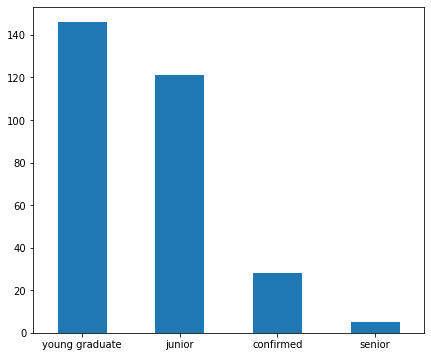

In [97]:
#Grade Visualisation
df_res['grade'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)

{'backend': 7, 'bi': 21, 'big_data': 73, 'c_skills': 47, 'cloud_skills': 7, 'css_skills': 2, 'data_skills': 73, 'deep_learning': 79, 'embarque_skills': 5, 'frontend': 32, 'git_skills': 5, 'java_skills': 74, 'machine_learning': 157, 'math_skills': 43, 'matlab_skills': 12, 'mobile_skills': 1, 'multimedia_skills': 6, 'networking': 2, 'nosql_skills': 6, 'other_skills': 569, 'php_skills': 9, 'po_skills': 31, 'python': 141, 'r_skills': 21, 'robo_skills': 5, 'scrum_skills': 9, 'sql_skills': 22, 'sys_skills': 28, 'teck_skills': 1, 'virtualisation': 6, 'web_scraping': 5}


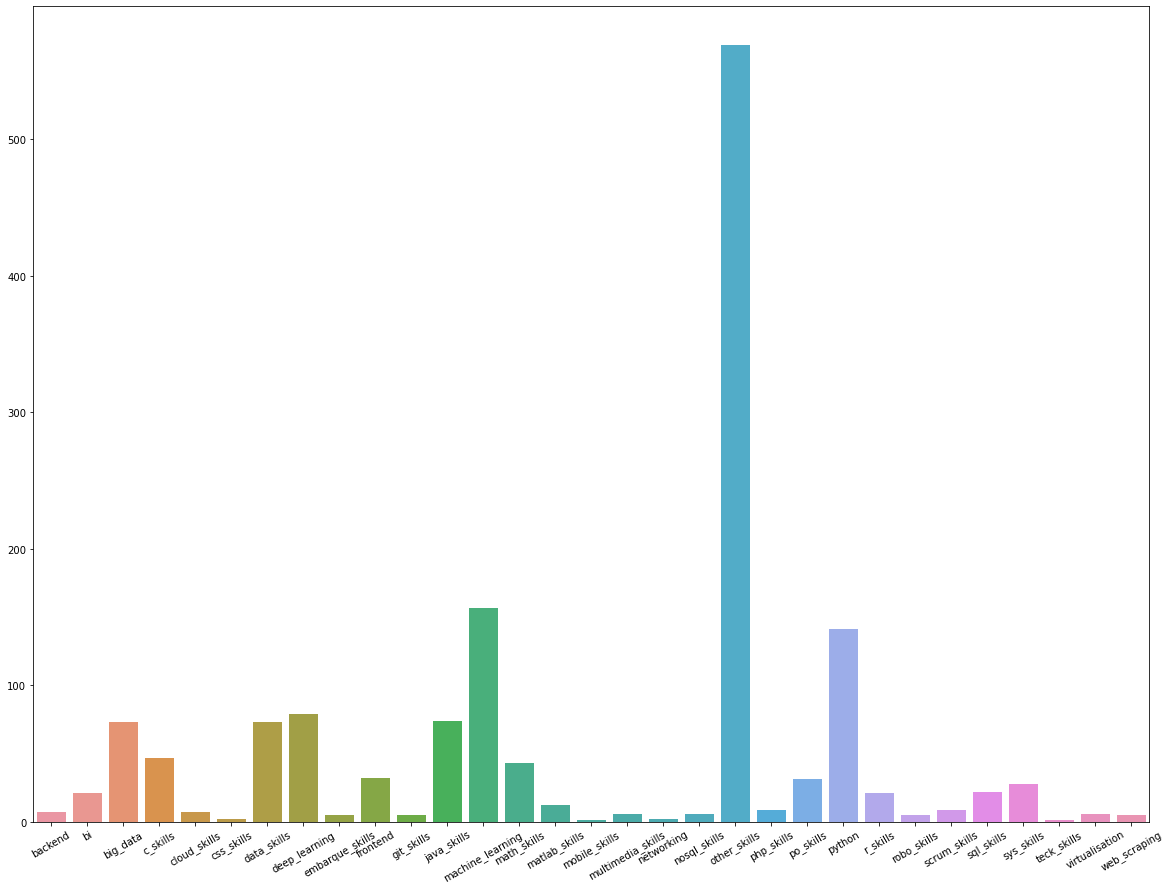

In [98]:
#skills distribution

import seaborn as sns
# Added [0] here to get a 1d-array for iteration by the zip function. 
count_list = np.asarray(skills_f.sum(axis=0))[0]

print(dict(zip(count_tokens_skills, count_list)))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,15))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=count_tokens_skills, y=count_list, ax=ax)
plt.xticks(rotation=30);

plt.savefig('skills_dist.png')

{'bac': 63, 'eng': 206, 'licence': 40, 'master': 128, 'other': 136, 'phd': 10, 'prep': 44}


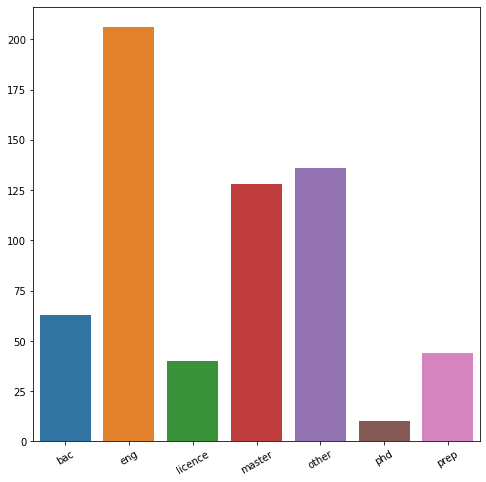

In [99]:
count_list = np.asarray(degree_f.sum(axis=0))[0]
print(dict(zip(count_tokens_degree, count_list)))
fig, ax = plt.subplots(figsize=(8,8))
all_plot = sns.barplot(x=count_tokens_degree, y=count_list, ax=ax)
plt.xticks(rotation=30);

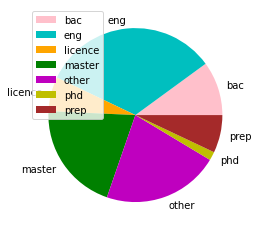

In [100]:
y = np.asarray(degree_f.sum(axis=0))[0]

yplabel = count_tokens_degree

ycolor = ["pink","c","orange","green","m","y","brown"]


plt.pie(y, labels=yplabel, colors = ycolor)
plt.legend()
plt.show()

# Modeling

In [110]:
#TSNE
#matrice => vectorisation 
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne_tfidf= tsne_model.fit_transform(vz)
print(tsne_tfidf.shape)
tsne_tfidf_df= pd.DataFrame(tsne_tfidf)
tsne_tfidf_df.columns=['x','y']
print(tsne_tfidf_df['x'])
print(tsne_tfidf_df['y'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.390411
[t-SNE] KL divergence after 500 iterations: 0.667111
(300, 2)
0     -1.326677
1     -6.525664
2     -5.971581
3      7.430565
4      2.545866
         ...   
295   -3.561499
296   -9.494818
297    1.203757
298   -3.557153
299    7.080658
Name: x, Length: 300, dtype: float32
0      -0.830928
1      12.163580
2      12.522201
3      -0.905978
4      13.716186
         ...    
295    -2.301771
296     1.163294
297    -4.833716
298    -2.301101
299   -12.131561
Name: y, Length: 300, dtype: float32


In [111]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize

from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation

from sklearn.model_selection import GridSearchCV


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from pickle import dump
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

LDA with TfidfVectorizer

In [118]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [120]:
#LDA - TFIDF
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vectorizer = TfidfVectorizer(lowercase = True,max_df = 0.5, min_df = 10)
dtm_tfidf = tfidf_vectorizer.fit_transform(df_profiles.skills)

lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)



LatentDirichletAllocation(random_state=0)

In [121]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

C:\Users\nada\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.218759 -0.275086       1        1  13.637947
4     -0.192712  0.008055       2        1  12.290207
8     -0.116772 -0.032819       3        1  12.126890
3     -0.147973  0.146064       4        1  11.621755
1     -0.038142 -0.024775       5        1  11.162844
0      0.198965 -0.066198       6        1   9.103171
7     -0.013339 -0.138512       7        1   8.585695
5     -0.150581  0.043864       8        1   8.514398
2     -0.089385  0.037832       9        1   6.764949
6      0.331182  0.301574      10        1   6.192143, topic_info=                Term       Freq      Total Category  logprob  loglift
1           big_data  36.000000  36.000000  Default  15.0000  15.0000
10         po_skills  25.000000  25.000000  Default  14.0000  14.0000
4      deep_learning  32.000000  32.000000  Default  13.0000  13.0000
6        java_skills  39.000000  39.000000  Default  12.0000  12.0000
8        math_skills  25.000000  25.000000  Default  11.0000  11.0000
..               ...        ...        ...      ...      ...      ...
4      deep_learning   0.151024  32.075951  Topic10  -5.0955  -2.5765
1           big_data   0.151022  36.923687  Topic10  -5.0955  -2.7173
6        java_skills   0.151025  39.436580  Topic10  -5.0955  -2.7831
11            python   0.151033  51.018456  Topic10  -5.0954  -3.0406
7   machine_learning   0.151036  54.913112  Topic10  -5.0954  -3.1141

[165 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         4  0.929058                bi
1         5  0.947901          big_data
1         6  0.054166          big_data
2         1  0.660777          c_skills
2         6  0.304974          c_skills
3         2  0.525538       data_skills
3         4  0.455466       data_skills
4         3  0.935280     deep_learning
4         6  0.031176     deep_learning
5         6  0.091242          frontend
5         7  0.912418          frontend
6         1  0.887501       java_skills
6         6  0.025357       java_skills
6         7  0.076072       java_skills
7         2  0.327791  machine_learning
7         3  0.163895  machine_learning
7         4  0.072842  machine_learning
7         5  0.072842  machine_learning
7         6  0.054632  machine_learning
7         7  0.109264  machine_learning
7         8  0.127474  machine_learning
7         9  0.072842  machine_learning
8         4  0.117420       math_skills
8         8  0.821940       math_skills
9         4  0.137277     matlab_skills
9         6  0.686387     matlab_skills
10        6  0.079439         po_skills
10       10  0.913549         po_skills
11        1  0.117604            python
11        2  0.294011            python
11        3  0.156806            python
11        4  0.058802            python
11        5  0.098004            python
11        6  0.019601            python
11        7  0.078403            python
11        8  0.098004            python
11        9  0.078403            python
12        4  0.833193          r_skills
12        9  0.092577          r_skills
13        9  0.952449        sql_skills
14        6  0.918628        sys_skills, R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 9, 4, 2, 1, 8, 6, 3, 7])

In [122]:
#LDA Topics visualisation
lda = LatentDirichletAllocation(10,random_state=0)
lda_df = tf_idf_dataframe
lda.fit(lda_df)
topics = pd.DataFrame(lda.components_, columns=lda_df.columns)

topics_list=[]
for i in range(len(topics)):
    tmp = topics.iloc[i,:].sort_values(ascending=False)[:9]
    print(tmp)
    topics_list.append(tmp)
    print("\n***********************************\n")
    

big_data            27.345124
other_skills        13.192480
python               6.518092
machine_learning     6.368191
git_skills           2.896999
virtualisation       2.887995
data_skills          0.100016
po_skills            0.100010
nosql_skills         0.100007
Name: 0, dtype: float64

***********************************

deep_learning       18.873476
other_skills        10.909934
python               8.428792
machine_learning     8.284497
php_skills           5.113121
scrum_skills         4.864022
java_skills          3.264410
c_skills             2.653176
robo_skills          2.391236
Name: 1, dtype: float64

***********************************

other_skills        20.342098
math_skills         20.090329
c_skills            15.527618
machine_learning     9.057097
deep_learning        8.474184
python               7.802931
data_skills          6.495963
matlab_skills        5.451240
po_skills            3.070501
Name: 2, dtype: float64

***********************************

sys_

LSA TruncatedSVD

In [124]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

C:\Users\nada\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\nada\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [125]:
from sklearn.decomposition import TruncatedSVD

#TruncatedSVD pour effectuer la décomposition de la matrice.

svd_model= TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=100)
lsa_model = svd_model.fit(vz)

print("Number of Topic : ", len(lsa_model.components_) )



Number of Topic :  10


In [126]:
# most important words for each topic
terms= vectorizer_skills.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    terms_comp= zip(terms, comp)
    sorted_terms= sorted(terms_comp, key= lambda x: x[1], reverse=True)[: 7] # 7 keyword of each topic
    print("Topic" +str(i)+ ":")
    for t in sorted_terms:
        print(t[0],end=" ")
    print("\n")

Topic0:
other_skills python machine_learning java_skills big_data deep_learning data_skills 

Topic1:
java_skills machine_learning python deep_learning big_data c_skills frontend 

Topic2:
java_skills c_skills other_skills sys_skills php_skills teck_skills css_skills 

Topic3:
big_data java_skills c_skills cloud_skills r_skills git_skills nosql_skills 

Topic4:
deep_learning big_data c_skills php_skills cloud_skills math_skills virtualisation 

Topic5:
data_skills math_skills deep_learning c_skills r_skills java_skills matlab_skills 

Topic6:
c_skills bi sys_skills frontend machine_learning po_skills matlab_skills 

Topic7:
bi machine_learning java_skills deep_learning big_data data_skills math_skills 

Topic8:
math_skills machine_learning frontend c_skills big_data java_skills embarque_skills 

Topic9:
frontend deep_learning data_skills java_skills big_data backend embarque_skills 



In [127]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
    imp_words_topic=""
    comp=lsa_model.components_[index]
    terms_comp = zip(terms, comp)
    sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]
    wordcloud = WordCloud(max_font_size=200, background_color="white").generate(imp_words_topic)
    plt.figure( figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Topic " +str(index))
    plt.show()
    

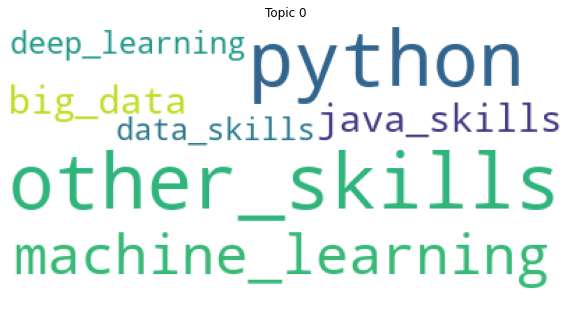

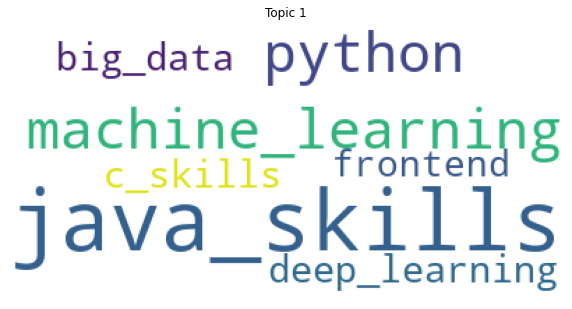

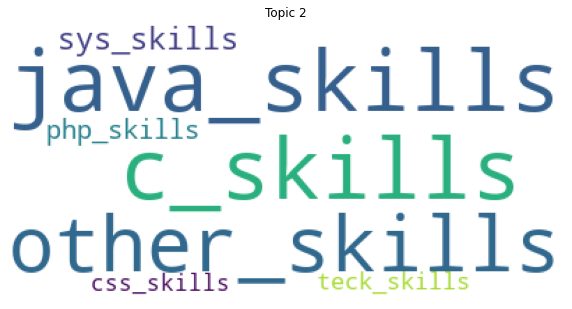

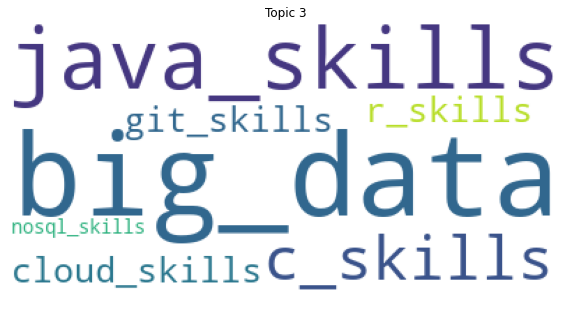

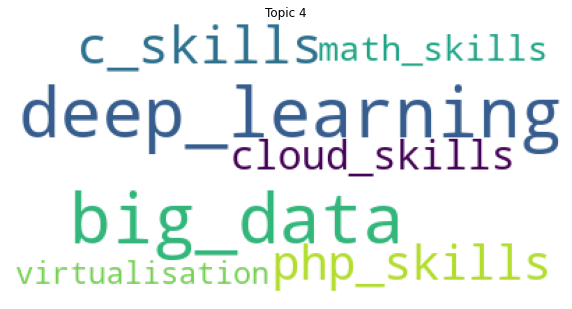

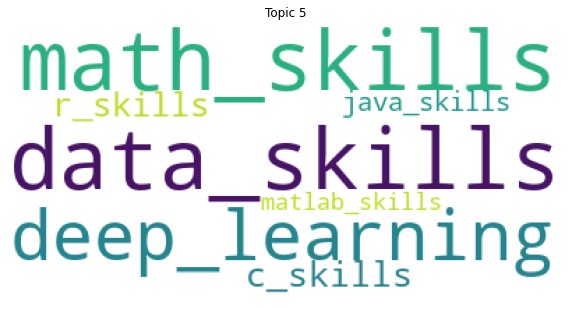

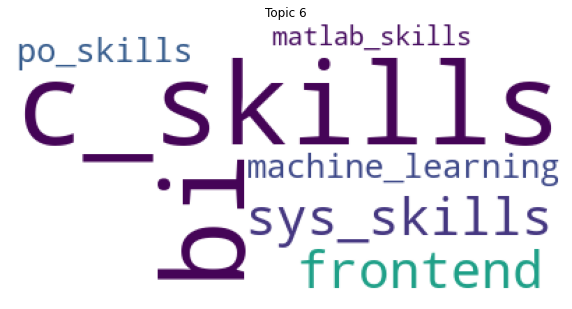

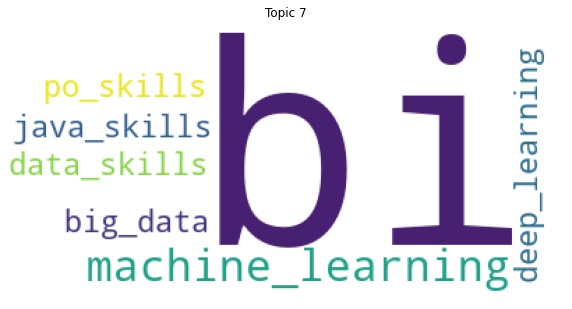

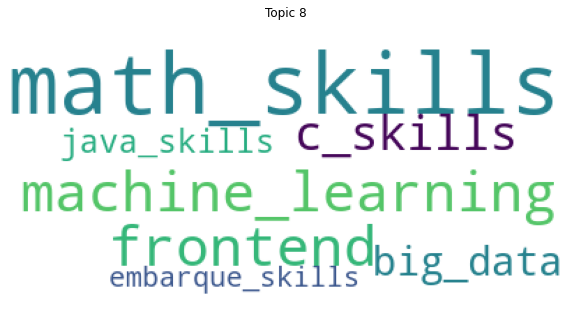

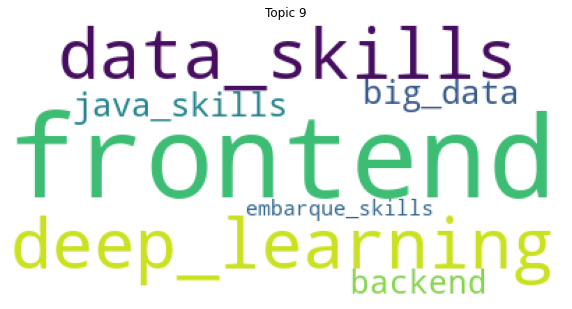

In [130]:
draw_word_cloud(0)
draw_word_cloud(1)
draw_word_cloud(2)
draw_word_cloud(3)
draw_word_cloud(4)
draw_word_cloud(5)
draw_word_cloud(6)
draw_word_cloud(7)
draw_word_cloud(8)
draw_word_cloud(9)

Distance de similarité

In [128]:
#profile test skills
skills_test="python , django , dl , ml , data engineering , big data , data mining , bi , web scraping , data preparation , data visualization , sql , mongo , angular , cloud computing , r , statistics , mathematics , data analytics "
skills_test_final= replace_skills(skills_test)
#document of skills must be a list to apply countvectorizer_tfidf
profile_skills=[skills_test_final]

#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
re_exp = r" , "
vectorizer = TfidfVectorizer(tokenizer=lambda text: re.split(re_exp,text))
vz_profile = vectorizer.fit_transform(profile_skills)
tf_idf_dataframe_profile=pd.DataFrame(vz_profile.toarray(),columns=vectorizer.get_feature_names())
print("\nTfidfVectorizer profile skills\n")
print(tf_idf_dataframe_profile)

#tf_idf_dataframe_profile.to_csv('profile_test_final.csv', index = False, header=True, encoding='utf-8', sep=';')


TfidfVectorizer profile skills

         bi  big_data  cloud_skills  data_skills  deep_learning  frontend  \
0  0.174078  0.348155      0.174078     0.522233       0.174078  0.174078   

   machine_learning  math_skills  nosql_skills    python  r_skills  \
0          0.348155     0.348155      0.174078  0.348155  0.174078   

   sql_skills  web_scraping  
0    0.174078      0.174078  


In [129]:
tf_idf_dataframe_profile=pd.read_csv('profile_test_final.csv', encoding ="utf8", sep=';')
tf_idf_dataframe_profile

,backend,bi,big_data,c_skills,cloud_skills,css_skills,data_skills,deep_learning,embarque_skills,frontend,...,teck_skills,virtualisation,web_scraping,bac,eng,licence,master,other,phd,prep
0,0.0,0.174078,0.348155,0.0,0.174078,0.0,0.522233,0.174078,0.0,0.174078,...,0.0,0.0,0.174078,1,1,0,1,0,0,1


In [130]:
df_test=pd.read_csv('data_preparation_final.csv', encoding ="utf8", sep=';')
df_test

,backend,bi,big_data,c_skills,cloud_skills,css_skills,data_skills,deep_learning,embarque_skills,frontend,...,teck_skills,virtualisation,web_scraping,bac,eng,licence,master,other,phd,prep
0,0.0,0.174078,0.348155,0.000000,0.174078,0.000000,0.522233,0.174078,0.0,0.174078,...,0.0,0.000000,0.174078,1,1,0,1,0,0,1
1,0.0,0.000000,0.319065,0.000000,0.000000,0.000000,0.329545,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,1,0,0,1,0,0,0
2,0.0,0.000000,0.000000,0.421962,0.000000,0.000000,0.000000,0.346133,0.0,0.000000,...,0.0,0.000000,0.000000,0,1,0,0,0,0,0
3,0.0,0.000000,0.000000,0.494834,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,1,1,0,0,0,0,0
4,0.0,0.000000,0.347271,0.000000,0.000000,0.000000,0.000000,0.351720,0.0,0.000000,...,0.0,0.000000,0.000000,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.0,0.000000,0.000000,0.919572,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0,2,0,0,0,0,2
291,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0,1,0,1,0,0,0
292,0.0,0.000000,0.265369,0.655297,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.491488,0.000000,0,1,0,0,0,0,0
293,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.830912,...,0.0,0.000000,0.000000,0,1,0,0,0,0,0


 Distance euclidean

In [131]:
from scipy.spatial import distance

def euclid (us1, us2):
    return distance.euclidean(us1, us2)

def euclid_near(df,n):
    base_user= tf_idf_dataframe_profile.iloc[0].values
    tmp = df
    results = []
    
    for item,index in zip(tmp.values, tmp.index):
        results.append({"id": index, "distance": euclid(base_user, item)})
    
    return sorted(results, key=lambda x:x["distance"])[:n]


In [133]:
euclid_near(df_test,10)

[{'id': 0, 'distance': 0.0},
 {'id': 118, 'distance': 0.9273813138325391},
 {'id': 4, 'distance': 1.3168493021988201},
 {'id': 134, 'distance': 1.3717430777383508},
 {'id': 14, 'distance': 1.4338290367848237},
 {'id': 63, 'distance': 1.4644320916451383},
 {'id': 98, 'distance': 1.4990467543973574},
 {'id': 277, 'distance': 1.5047323555473102},
 {'id': 104, 'distance': 1.5119844852001219},
 {'id': 259, 'distance': 1.512480208382138}]

Cosine Similarity

In [132]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine(us1,us2):
    return cosine_similarity(us1, us2)


def cosine_near(df,n):
    base_user= tf_idf_dataframe_profile.iloc[0].values
    tmp = df
    results = []
    
    for item,index in zip(tmp.values, tmp.index):
        results.append({"id": index, "distance": cosine([base_user], [item])[0][0]})
        
    return sorted(results, key=lambda x:x["distance"], reverse=True)[:n]   

In [134]:
cosine_near(df_test,10)

[{'id': 0, 'distance': 0.9999999999999998},
 {'id': 118, 'distance': 0.9139963898754232},
 {'id': 4, 'distance': 0.8123532008430593},
 {'id': 134, 'distance': 0.7958524741090508},
 {'id': 14, 'distance': 0.7763778162322614},
 {'id': 63, 'distance': 0.7664613417326765},
 {'id': 98, 'distance': 0.7549925691079962},
 {'id': 277, 'distance': 0.7530831582433049},
 {'id': 104, 'distance': 0.7506371657829836},
 {'id': 259, 'distance': 0.7504695392531906}]

In [68]:
import webbrowser
def open_browser(link):
    webbrowser.open(link)

In [135]:
for item in cosine_near(df_test,10):
    print(item['id'])
    
    i=item['id']
    print(df_profiles.iloc[i])
    open_browser(df_profiles.iloc[i][0])


0
link                https://www.linkedin.com/in/mariem-moslah-5159...
fullName                                                Mariem Moslah
location                                               Tunis, Tunisie
profile_title       Data | Machine Learning | Big data | Python | R&D
connectionsCount                                        461 relations
job_title           ['R&D Engineer', 'Data scientist/ Big data', '...
company_name        ['mANTU\n        Temps plein', 'LARODEC resear...
joining_date        ['nov. 2018 – avr. 2020', 'févr. 2017 – déc. 2...
exp_duree                        ['1 an 6 mois', '11 mois', '3 mois']
college_name        ['Polytech Nantes', 'Institut supérieur de Ges...
degree_name                                               master, bac
degree_year             ['2016 – 2017', '2015 – 2017', '2012 – 2015']
skills              python , machine_learning , machine_learning ,...
endorsements                                                  Unknown
language          

# Evaluation

LDA WITH gensim

In [136]:
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
    output = []
    for sent in texts:
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output

In [137]:
text_list=df_profiles['skills'].tolist()
tokenized_reviews = lemmatization(text_list)

# Create Dictionary
dictionary = corpora.Dictionary(tokenized_reviews)

# Term Document Frequency
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [139]:
import gensim
from gensim import corpora
#create LDA MODEL
def LDA_model_create(num_topics):
    
    """
    Input  :number of topics
    Purpose: create LDA model using gensim
    Output : return LDA model
    """
        
    return gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix, 
                                           id2word=dictionary, 
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=1000, 
                                           passes=10,
                                           iterations=100)

In [140]:
#Calcul de la cohérence
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model= LDA_model_create(num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

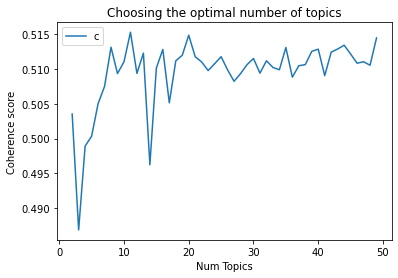

In [145]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title("Choosing the optimal number of topics")
plt.show()

In [146]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.5035
Num Topics = 3  has Coherence Value of 0.4869
Num Topics = 4  has Coherence Value of 0.4989
Num Topics = 5  has Coherence Value of 0.5003
Num Topics = 6  has Coherence Value of 0.505
Num Topics = 7  has Coherence Value of 0.5075
Num Topics = 8  has Coherence Value of 0.5131
Num Topics = 9  has Coherence Value of 0.5093
Num Topics = 10  has Coherence Value of 0.511
Num Topics = 11  has Coherence Value of 0.5152
Num Topics = 12  has Coherence Value of 0.5094
Num Topics = 13  has Coherence Value of 0.5123
Num Topics = 14  has Coherence Value of 0.4962
Num Topics = 15  has Coherence Value of 0.5101
Num Topics = 16  has Coherence Value of 0.5128
Num Topics = 17  has Coherence Value of 0.5051
Num Topics = 18  has Coherence Value of 0.5112
Num Topics = 19  has Coherence Value of 0.5119
Num Topics = 20  has Coherence Value of 0.5148
Num Topics = 21  has Coherence Value of 0.5117
Num Topics = 22  has Coherence Value of 0.511
Num Topics = 23  has Coh

In [147]:
def compute_coherence_value(corpus, dictionary, k, a, b): 
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                           id2word=dictionary, 
                                           num_topics=k, 
                                           random_state=100, 
                                           chunksize=100, 
                                           passes=10, 
                                           alpha =a, 
                                           eta=b) 
    

    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [150]:
import numpy as np
import tqdm
k=11

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
#alpha.append('symmetric')
#alpha.append('asymmetric')

beta = list(np.arange(0.01, 1, 0.3))
#beta.append('symmetric')


model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

for a in alpha:
    for b in beta:
        cv = compute_coherence_value(corpus=doc_term_matrix, dictionary=dictionary, 
                                                  k=k, a=a, b=b)
        # Save the model results
        model_results['Topics'].append(k)
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(cv)
                    
pd.DataFrame(model_results).to_csv('lda_tuning_results9.csv', index=False, encoding='utf-8', sep=';',)

In [152]:
lda_model_optimal=LDA_model_create(num_topics=10)

In [153]:
import pyLDAvis.gensim_models

vis = pyLDAvis.gensim_models.prepare(lda_model_optimal, doc_term_matrix, dictionary)
vis

C:\Users\nada\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.178459 -0.046820       1        1  16.508590
1     -0.099359  0.001502       2        1  15.082727
5     -0.184983  0.121525       3        1  12.377971
9     -0.138684  0.146073       4        1  12.216394
4     -0.076581 -0.189181       5        1  11.379435
7     -0.098588 -0.085163       6        1  11.219312
2      0.310684 -0.115528       7        1   8.387519
6      0.357389  0.212770       8        1   5.619216
3      0.133126 -0.187795       9        1   4.791403
0     -0.024545  0.142616      10        1   2.417432, topic_info=             Term        Freq       Total Category  logprob  loglift
3     other_skill  218.000000  218.000000  Default  22.0000  22.0000
6      java_skill   70.000000   70.000000  Default  21.0000  21.0000
0        big_data   68.000000   68.000000  Default  20.0000  20.0000
7         c_skill   49.000000   49.000000  Default  19.0000  19.0000
5   deep_learning   81.000000   81.000000  Default  18.0000  18.0000
..            ...         ...         ...      ...      ...      ...
9      math_skill    0.294123   42.814887  Topic10  -4.3354  -1.2582
5   deep_learning    0.486208   81.400832  Topic10  -3.8328  -1.3980
1      data_skill    0.221138   71.545989  Topic10  -4.6206  -2.0568
6      java_skill    0.213511   70.621191  Topic10  -4.6557  -2.0789
0        big_data    0.196143   68.607389  Topic10  -4.7406  -2.1348

[242 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.014576        big_data
0         4  0.014576        big_data
0         5  0.918268        big_data
0         6  0.043727        big_data
7         6  0.020280         c_skill
...     ...       ...             ...
15        7  0.035613       sys_skill
21        7  0.498439      teck_skill
16        2  0.437308  virtualisation
16        5  0.145769  virtualisation
16        6  0.291539  virtualisation

[74 rows x 3 columns], R=22, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 6, 10, 5, 8, 3, 7, 4, 1])

In [154]:
from pprint import pprint
# Print the Keyword in the topics
pprint(lda_model_optimal.print_topics())
doc_lda = lda_model_optimal[doc_term_matrix]

[(0,
  '0.364*"other_skill" + 0.183*"robo_skill" + 0.120*"c_skill" + 0.090*"python" '
  '+ 0.073*"machine_learning" + 0.022*"deep_learning" + 0.013*"math_skill" + '
  '0.011*"sql_skill" + 0.010*"data_skill" + 0.010*"java_skill"'),
 (1,
  '0.373*"machine_learning" + 0.239*"python" + 0.148*"deep_learning" + '
  '0.123*"math_skill" + 0.062*"other_skill" + 0.023*"sql_skill" + '
  '0.021*"virtualisation" + 0.001*"big_data" + 0.001*"java_skill" + '
  '0.001*"php_skill"'),
 (2,
  '0.732*"java_skill" + 0.177*"python" + 0.039*"c_skill" + 0.013*"sys_skill" + '
  '0.012*"teck_skill" + 0.005*"machine_learning" + 0.003*"other_skill" + '
  '0.001*"data_skill" + 0.001*"r_skill" + 0.001*"deep_learning"'),
 (3,
  '0.186*"python" + 0.167*"java_skill" + 0.140*"data_skill" + 0.125*"r_skill" '
  '+ 0.124*"nosql_skill" + 0.108*"sql_skill" + 0.044*"machine_learning" + '
  '0.034*"php_skill" + 0.026*"deep_learning" + 0.006*"c_skill"'),
 (4,
  '0.592*"big_data" + 0.155*"python" + 0.094*"data_skill" + '
  '0.06

LSA WITH GENSIM

In [157]:
def create_gensim_lsa_model(number_of_topics):
    """
    Input  :number of topics
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
    print(lsamodel.print_topics(num_topics=number_of_topics))
    return lsamodel

In [158]:
def compute_coherence_values(dictionary, doc_term_matrix,texts, stop, start=2, step=1):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LSA model with respective number of topics
    """
    coherence_values_LSA = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_LSA.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values_LSA


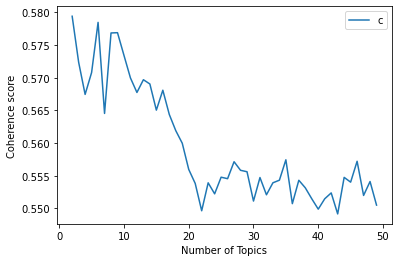

In [159]:
stop=50; start=2; step=1;
model_list, coherence_values_LSA = compute_coherence_values(dictionary, doc_term_matrix, tokenized_reviews, stop, start, step)
    # Show graph

x = range(start, stop, step)
plt.plot(x, coherence_values_LSA)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [160]:
for m, cv in zip(x, coherence_values_LSA):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.5794
Num Topics = 3  has Coherence Value of 0.5724
Num Topics = 4  has Coherence Value of 0.5674
Num Topics = 5  has Coherence Value of 0.5708
Num Topics = 6  has Coherence Value of 0.5785
Num Topics = 7  has Coherence Value of 0.5645
Num Topics = 8  has Coherence Value of 0.5768
Num Topics = 9  has Coherence Value of 0.5769
Num Topics = 10  has Coherence Value of 0.5734
Num Topics = 11  has Coherence Value of 0.57
Num Topics = 12  has Coherence Value of 0.5677
Num Topics = 13  has Coherence Value of 0.5697
Num Topics = 14  has Coherence Value of 0.569
Num Topics = 15  has Coherence Value of 0.565
Num Topics = 16  has Coherence Value of 0.5681
Num Topics = 17  has Coherence Value of 0.5644
Num Topics = 18  has Coherence Value of 0.5619
Num Topics = 19  has Coherence Value of 0.56
Num Topics = 20  has Coherence Value of 0.556
Num Topics = 21  has Coherence Value of 0.5538
Num Topics = 22  has Coherence Value of 0.5496
Num Topics = 23  has Coheren

In [161]:
number_of_topics_optimal=9
model_lsa_optimal=create_gensim_lsa_model(number_of_topics_optimal)

[(0, '-0.790*"other_skill" + -0.363*"python" + -0.269*"deep_learning" + -0.252*"machine_learning" + -0.224*"data_skill" + -0.132*"math_skill" + -0.119*"big_data" + -0.091*"c_skill" + -0.088*"java_skill" + -0.083*"sys_skill"'), (1, '-0.575*"other_skill" + 0.557*"python" + 0.355*"machine_learning" + 0.341*"deep_learning" + 0.242*"java_skill" + 0.180*"big_data" + 0.105*"c_skill" + 0.087*"sql_skill" + 0.071*"sys_skill" + 0.024*"virtualisation"'), (2, '-0.570*"big_data" + 0.540*"deep_learning" + -0.489*"data_skill" + 0.279*"machine_learning" + -0.242*"python" + 0.066*"other_skill" + -0.032*"math_skill" + -0.032*"r_skill" + -0.018*"po_skill" + 0.016*"sys_skill"'), (3, '-0.552*"java_skill" + 0.460*"deep_learning" + 0.371*"big_data" + -0.352*"python" + 0.296*"data_skill" + 0.196*"math_skill" + -0.173*"c_skill" + 0.169*"machine_learning" + -0.122*"other_skill" + -0.119*"sys_skill"'), (4, '-0.653*"big_data" + 0.471*"data_skill" + -0.283*"java_skill" + 0.254*"python" + -0.254*"c_skill" + -0.213*"

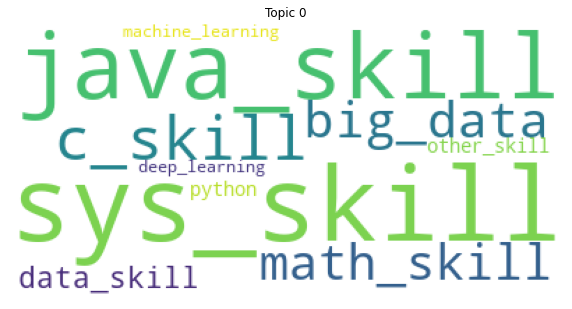

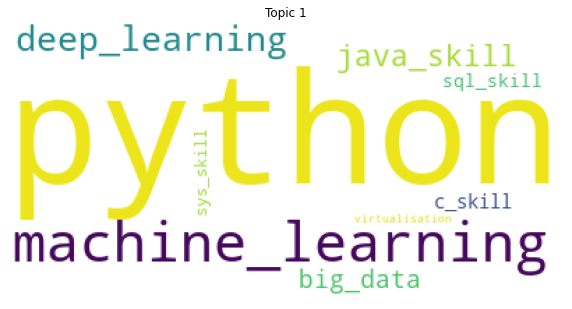

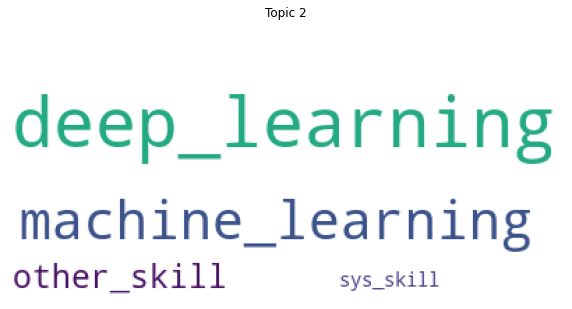

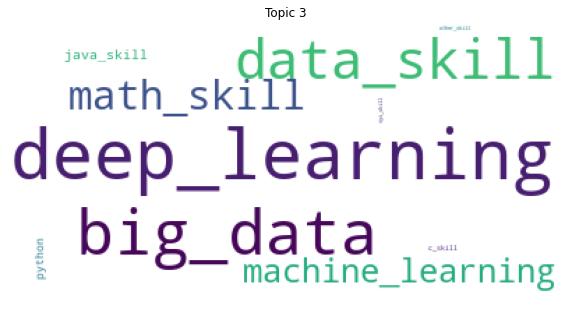

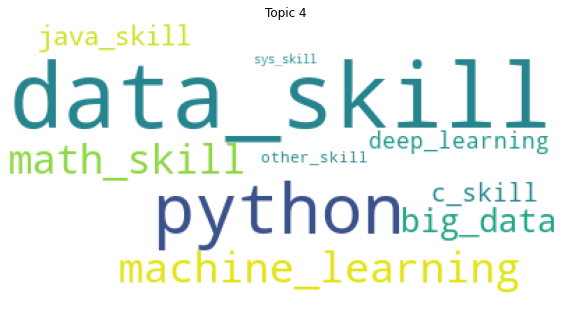

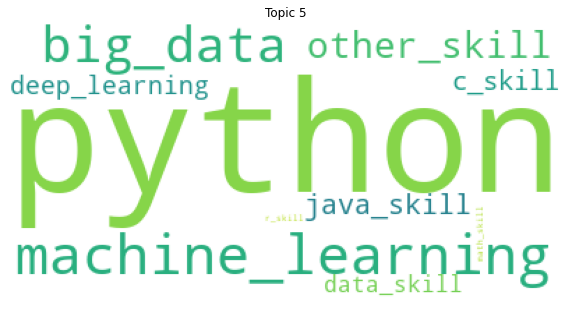

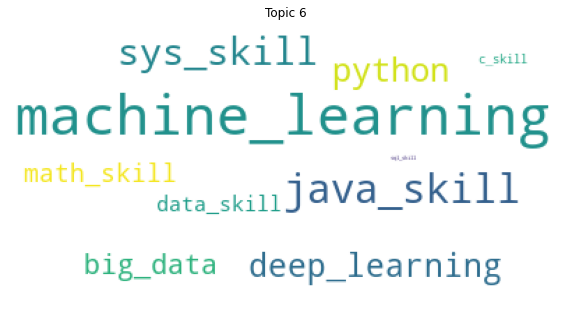

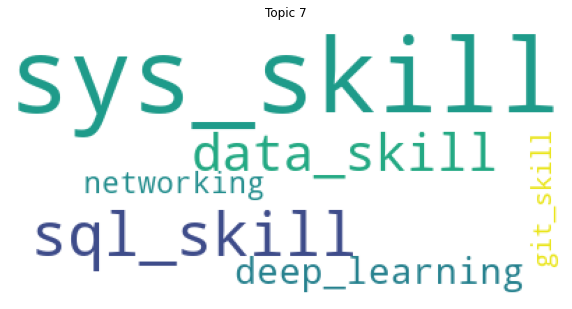

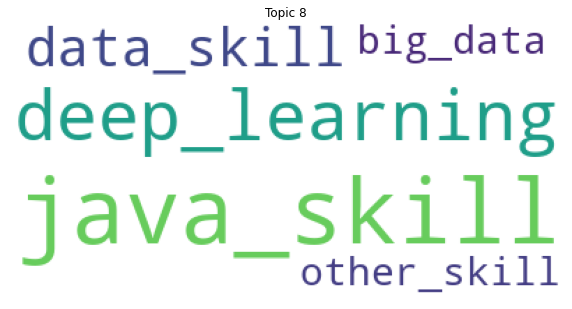

In [162]:
import gensim
from wordcloud import WordCloud

for t in range(number_of_topics_optimal):
    plt.figure(figsize=[10,10])
    plt.imshow(WordCloud(max_font_size=200, background_color="white").fit_words(dict(model_lsa_optimal.show_topic(t))))
    plt.axis("off")
    plt.title("Topic " + str(t))
    plt.savefig('Topic '+ str(t)+'.png')
    plt.show()